In [30]:
%matplotlib inline
%config IPCompleter.greedy=True

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import openpyxl as oxl
import SingleFocus_1 as sf1
import Dropper as dropper
import time as t
# experiment
import missingno as msno
# from pylab import rcParams
# import everything needed

from scipy.stats import ttest_ind # prepare for the t test

### Above is consist of all modules

In [2]:
def grouping(df):
    """
    create a list of dataframes, each element of the list contains a dataframe
    that is grouped by ID
    """
    # convert the values from the projid to a list
    projid_list = df.projid.unique()
    projid_list = projid_list.tolist() #list acquired this is a unique list of ID

    list_of_patients = []
    counter_start_df_row = 0 # used for slicing the df, first
    counter_end_df_row   = 0 # used for slicing the df, last
    counter_flag_start   = 0 # "for loop" start index for df spliting based on unique ID
    df = df.reset_index(drop = True) # df reindexed

    # messy
    for p_id in projid_list: # loop through the unique id list
        for df_index in range(counter_flag_start, df.shape[0]): 
            if df.iloc[df_index]['projid'] == p_id:
                counter_end_df_row += 1
            elif df.iloc[df_index]['projid'] != p_id:
                break
        # print("List appended ===>>> " + str(p_id))
        list_of_patients.append(df[counter_start_df_row: counter_end_df_row])
        counter_start_df_row = counter_end_df_row
        counter_flag_start = counter_end_df_row

    # print (list_of_patients) #CHECKED
    return list_of_patients # a list of df, that each element of the list is one patient

def patient_analysis(list_of_patient_diagnosed, list_of_patient_not_diagnosed = None):
    """
    list = [df1, df2, df3 ...]
    Analysis DF on a patient based scale
    """
    temp_list_p_diagnosed = list_of_patient_diagnosed.copy()
    # example of heatMap =  SNS https://stackoverflow.com/questions/12286607/python-making-heatmap-from-dataframe
    # heatmap matplot = https://stackoverflow.com/questions/12286607/python-making-heatmap-from-dataframe
    """
    plan:
        . . .
    """
    interesting_attr = ['chlstrl',
                        'crn', 'gfr_mdrs', 'glucose',
                        'hba1c', 'hdlchlstrl',
                        'hdlratio',
                        'hemacrit',
                        'hemoglbn',
                        'ldlchlstrl',
                        'mch',
                        'mchc',
                        'mcv',
                        'platelet', 'rbc', 'dcfdx'] # some interesting attr
    # for patient in temp_list_p_diagnosed:
        
        

    # need to finish this tomorrow


def sort_patient(list_of_patient):
    """
    split the patient based of if the patient was diagnosed or not
    """
    list_of_patient_diagnosed = []      # with alzheimer
    list_of_patient_not_diagnosed = []  # without alzheimer
    diagonosed_flag = False

    for patient in list_of_patient:
        dcfdx_check_list = patient['dcfdx'].tolist()
        for dcfdx_element in dcfdx_check_list:
            if dcfdx_element >= 4: # >= 4 means diagnoised
                diagonosed_flag = True
                break
        if (diagonosed_flag) == True:
            list_of_patient_diagnosed.append(patient)
            diagonosed_flag = False
        else:
            list_of_patient_not_diagnosed.append(patient)
    
    return list_of_patient_diagnosed, list_of_patient_not_diagnosed

def output_table_xlsx(df, output_filename): # dataframe, string
    """
    helper function to output df back to xlsx
    to get a better view of all the columns
    """
    writer_excel = pd.ExcelWriter(output_filename + ".xlsx")
    df.to_excel(writer_excel, 'Sheet1')
    print ("file created")
    
def sort_cases(cleaned_df): # based on the parameter DF, create 2 DF, based on
                            # the value of "dcfdx". smaller or larger than 4
    dcfdx_split_lvl = 4     # diagnosed flag >= 4 diagnosed, smaller than 4 is not

    cleaned_df = cleaned_df.reset_index(drop = True)  # df reindexed
    # need to create 2 empty df
    df_column_name_list = list(cleaned_df)
    tot_rows = cleaned_df.shape[0]

    new_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list) #create a new empty df
    new_not_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list)

    for row in range(0, tot_rows):  # loop through all the rows in the DF
        if cleaned_df.iloc[row]['dcfdx'] >= dcfdx_split_lvl:
            # get the df row that is larger than 4
            new_diagnosed_df_by_case = new_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        elif cleaned_df.iloc[row]['dcfdx'] < dcfdx_split_lvl:
            # get the df row that is smaller than 4
            new_not_diagnosed_df_by_case = new_not_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        else:
            continue
    
    return new_diagnosed_df_by_case, new_not_diagnosed_df_by_case

### All the helper function should be added above
---
### The cell below is to load the dataset. While calling some function from the previous to group and sort the DF

In [3]:
path = '/Users/haominshi/Desktop/al_data/dataset_576_long.xlsx'
path_test = '/Users/haominshi/Desktop/al_data/dataset_testing_short.xlsx'
print ("Processing...")
timer_1 = t.time()
# =============================== Change path here
data_set_everything = sf1.openExcelSheet(path, sheet_name="Sheet0")
# data_set_everything = sf1.openExcelSheet(path_test, "Sheet1")
# ==========================================================================

# ==========================================================================
timer_1 = t.time() - timer_1
print (timer_1)
print (data_set_everything.shape)
print ("DF loaded")
# file transfered to DF
timer_1 = t.time()
# ==========================================================================
data_set_everything = dropper.drop_none_important_features(data_set_everything)
# drop none important features
data_set_everything = dropper.clean_history(data_set_everything)
# ==========================================================================
timer_1 = t.time() - timer_1
print(timer_1)
print(data_set_everything.shape)
data_set_cleaned = data_set_everything.copy() 
# the cleaned dataset's index is not droped
print("DF cleaned") 
# ==========================================================================
print("DF grouping")
timer_1 = t.time()
# list_of_patient = list of df based on each patient, each element of the list
# is a patient, and in that patient, we have the DF for each of their visit
list_of_patient = grouping(data_set_cleaned)
timer_1 = t.time() - timer_1
print(timer_1)
print("DF grouped dtype = list, total patient count is: " \
+ str(len(list_of_patient)))
# ==========================================================================
# print("DF sorting")

Processing...
28.71329116821289
(25570, 203)
DF loaded
0.7375175952911377
(3594, 123)
DF cleaned
DF grouping
1.2188611030578613
DF grouped dtype = list, total patient count is: 1189


----------

In [4]:
# 2 very important asset, all the manipulation use these 2
list_of_patient_diagnosed, list_of_patient_not_diagnosed = \
sort_patient(list_of_patient) # return 2 list of patient, split by if diagnosed
print("2 list generated, diagnosed, and not diagnosed")
print("Amount of patient diagnosed = " + str(len(list_of_patient_diagnosed)))
print("Amount of patient not diagnosed = " + str(len(list_of_patient_not_diagnosed)))
# ==========================================================================
# print (list_of_patient_diagnosed)
# output_table_xlsx(data_set_cleaned,"output_cleaned_dataSet")
# from column [66:] is boolean value [1,0]
patient_analysis(list_of_patient_diagnosed)

2 list generated, diagnosed, and not diagnosed
Amount of patient diagnosed = 271
Amount of patient not diagnosed = 918


---
### Visualize the DF we have now, white is empty value, dark is none empty

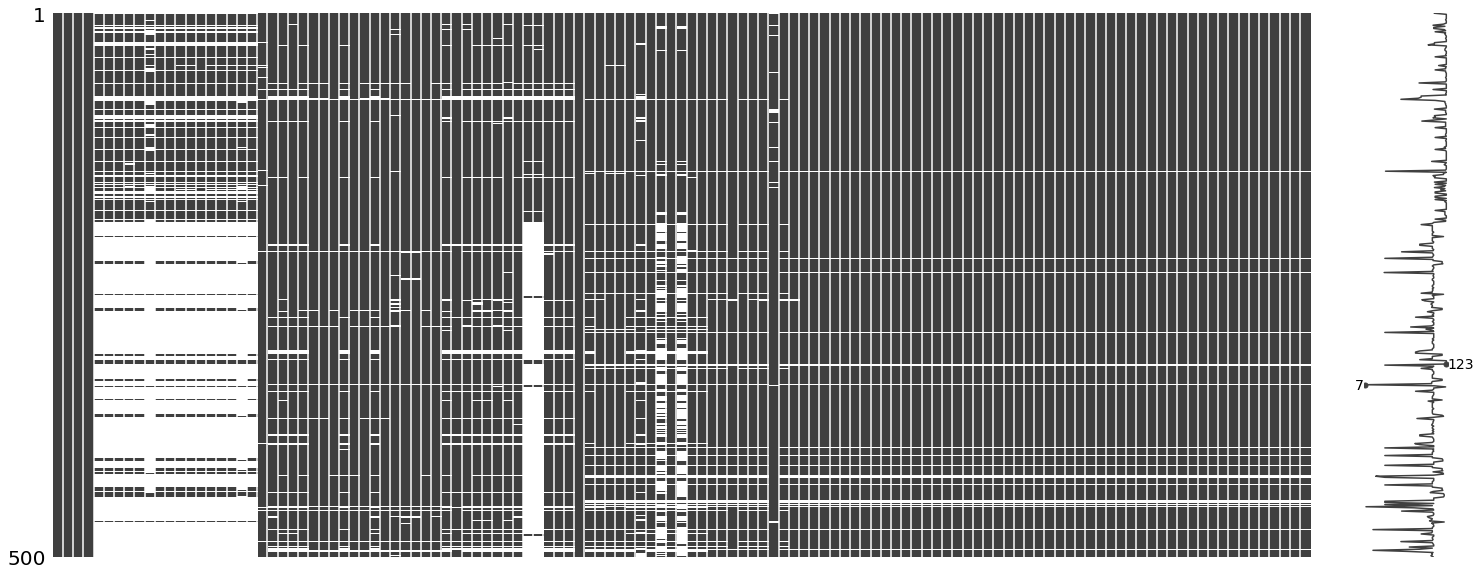

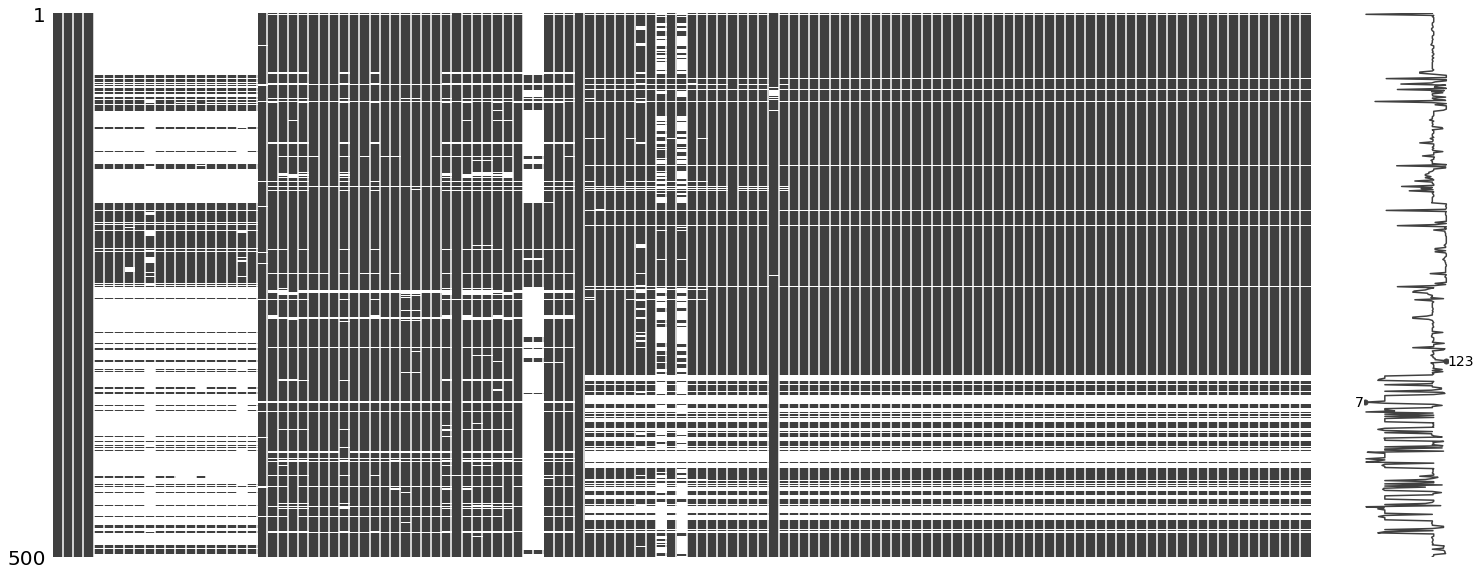

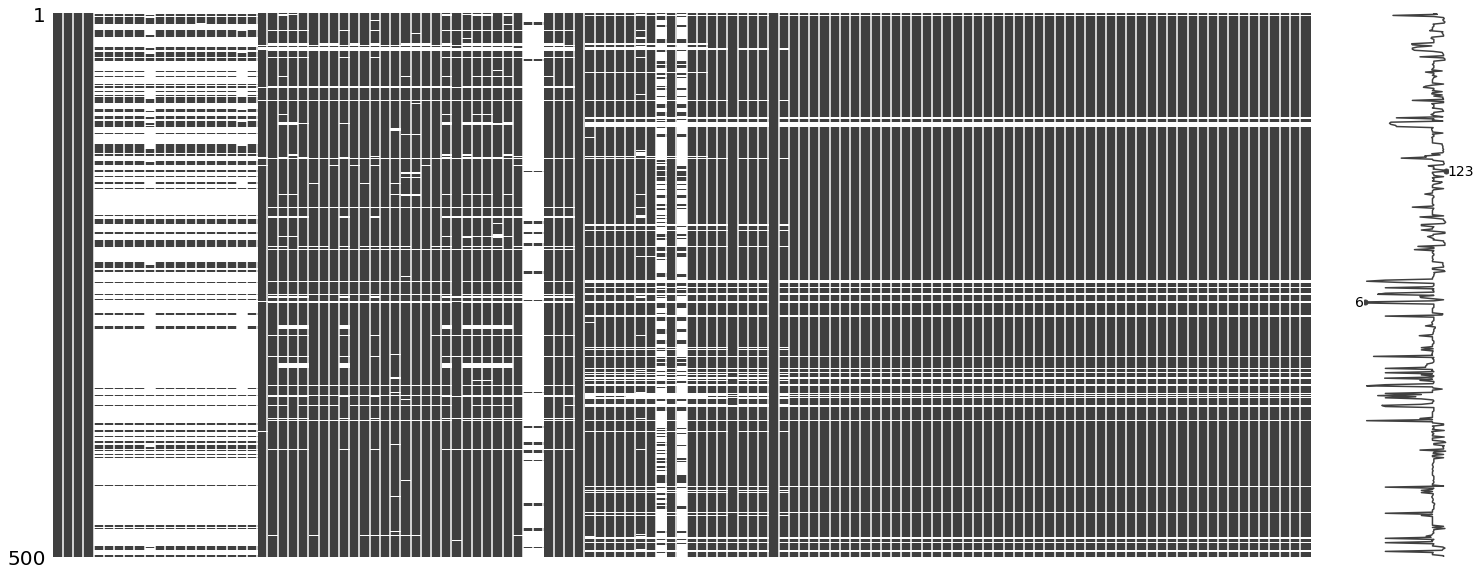

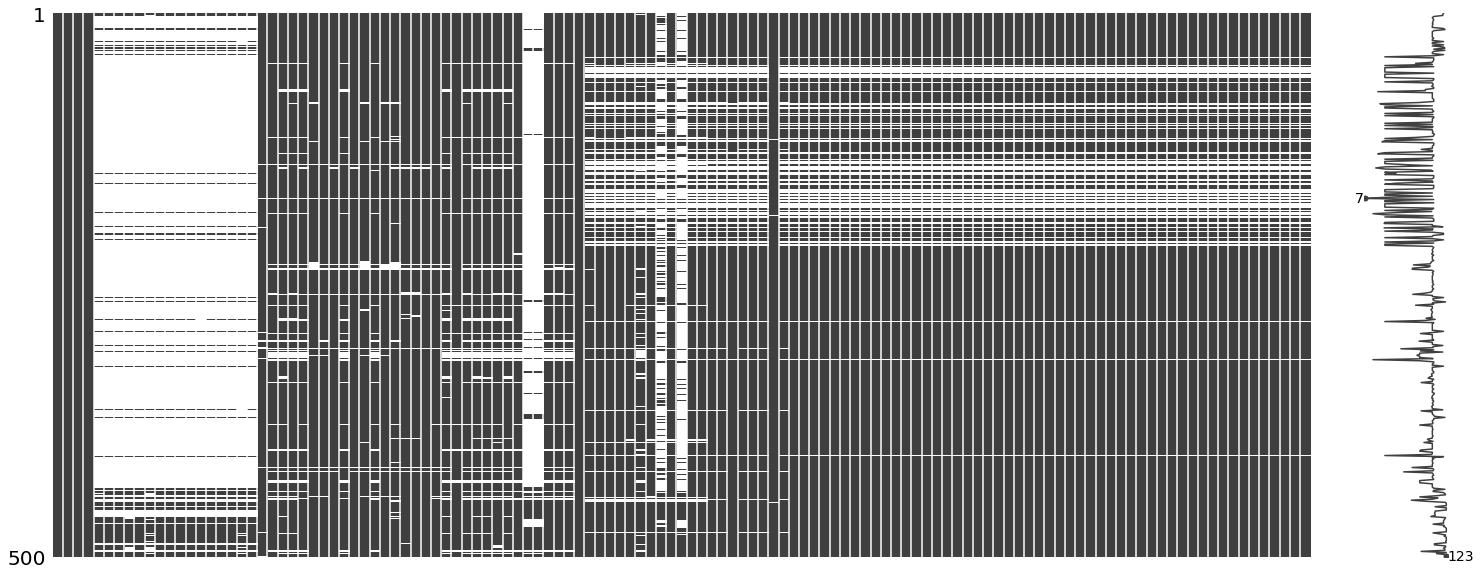

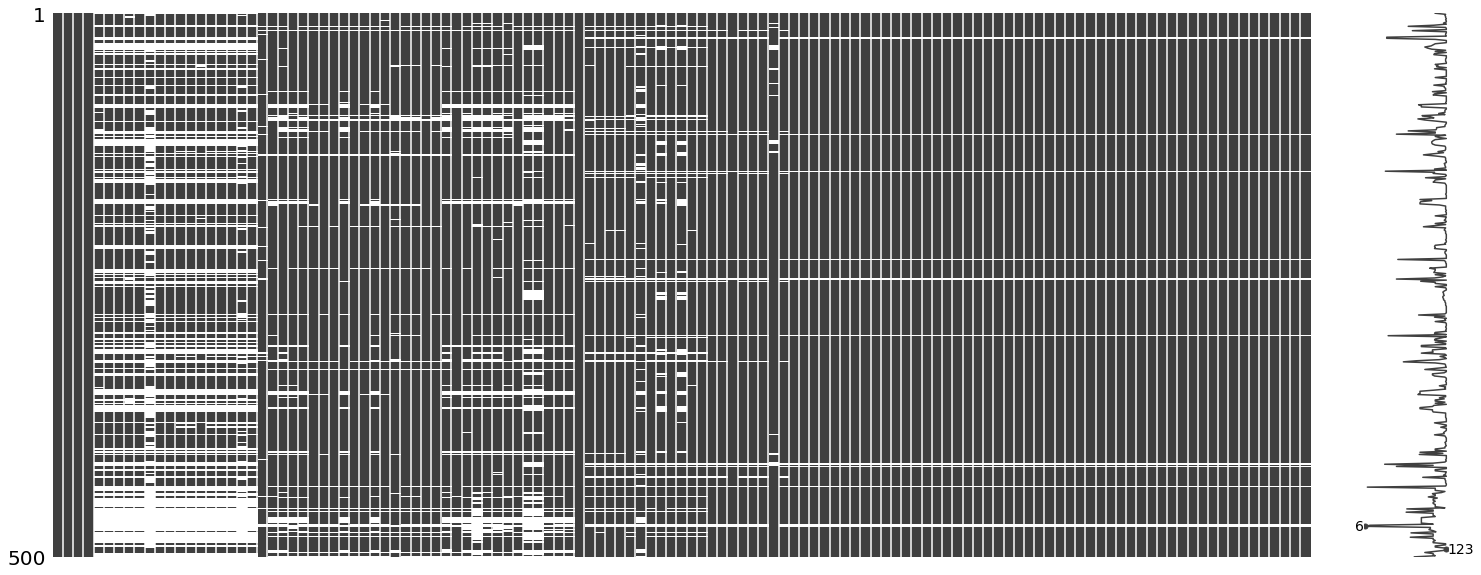

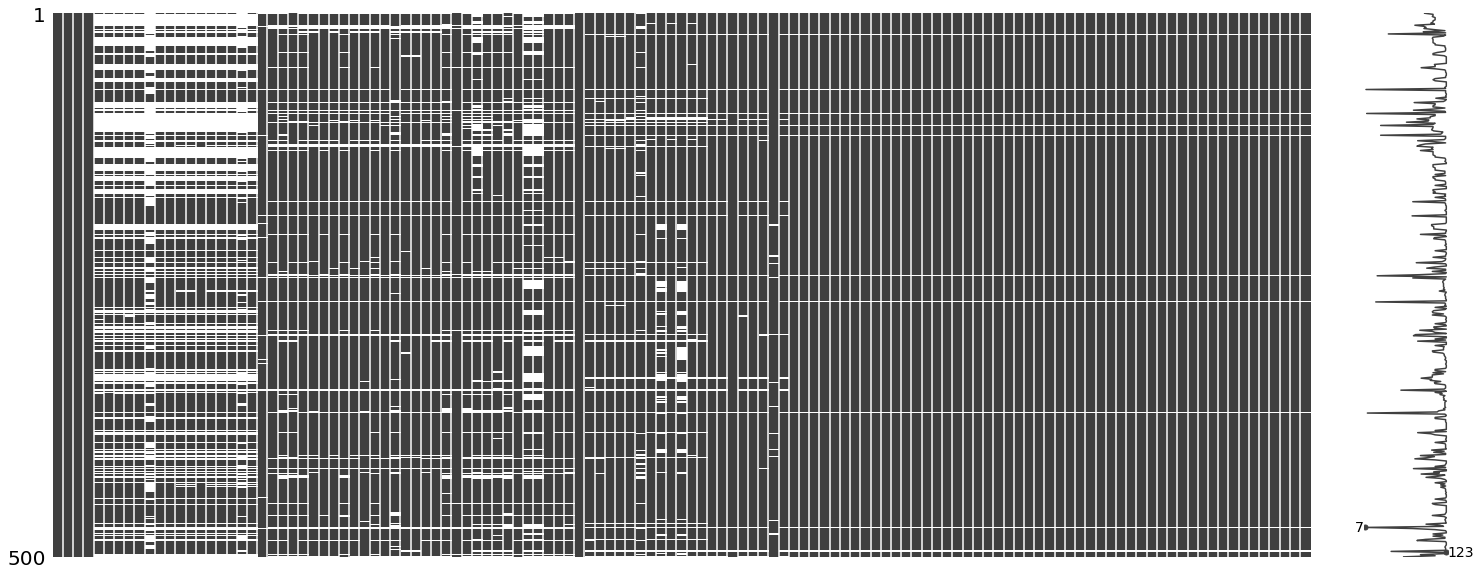

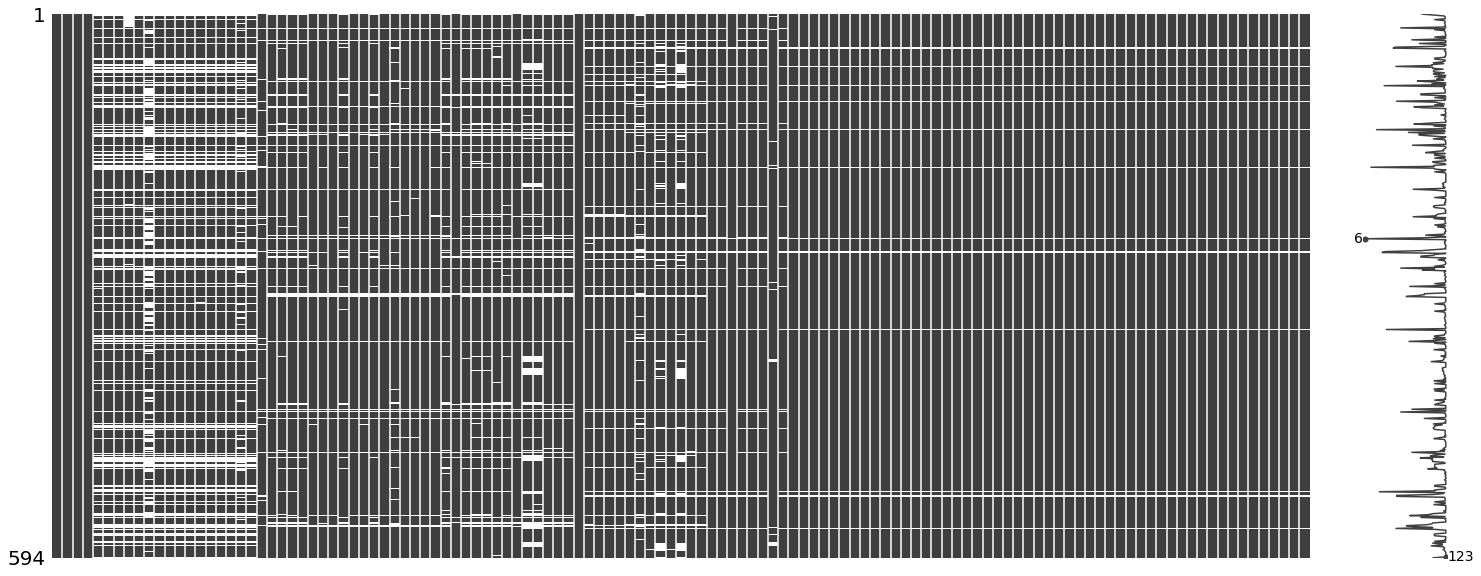

In [5]:
msno.matrix(data_set_cleaned[:500]) # visualize the missing data
msno.matrix(data_set_cleaned[500:1000]) 
msno.matrix(data_set_cleaned[1000:1500])
msno.matrix(data_set_cleaned[1500:2000])
msno.matrix(data_set_cleaned[2000:2500])
msno.matrix(data_set_cleaned[2500:3000])
msno.matrix(data_set_cleaned[3000:])

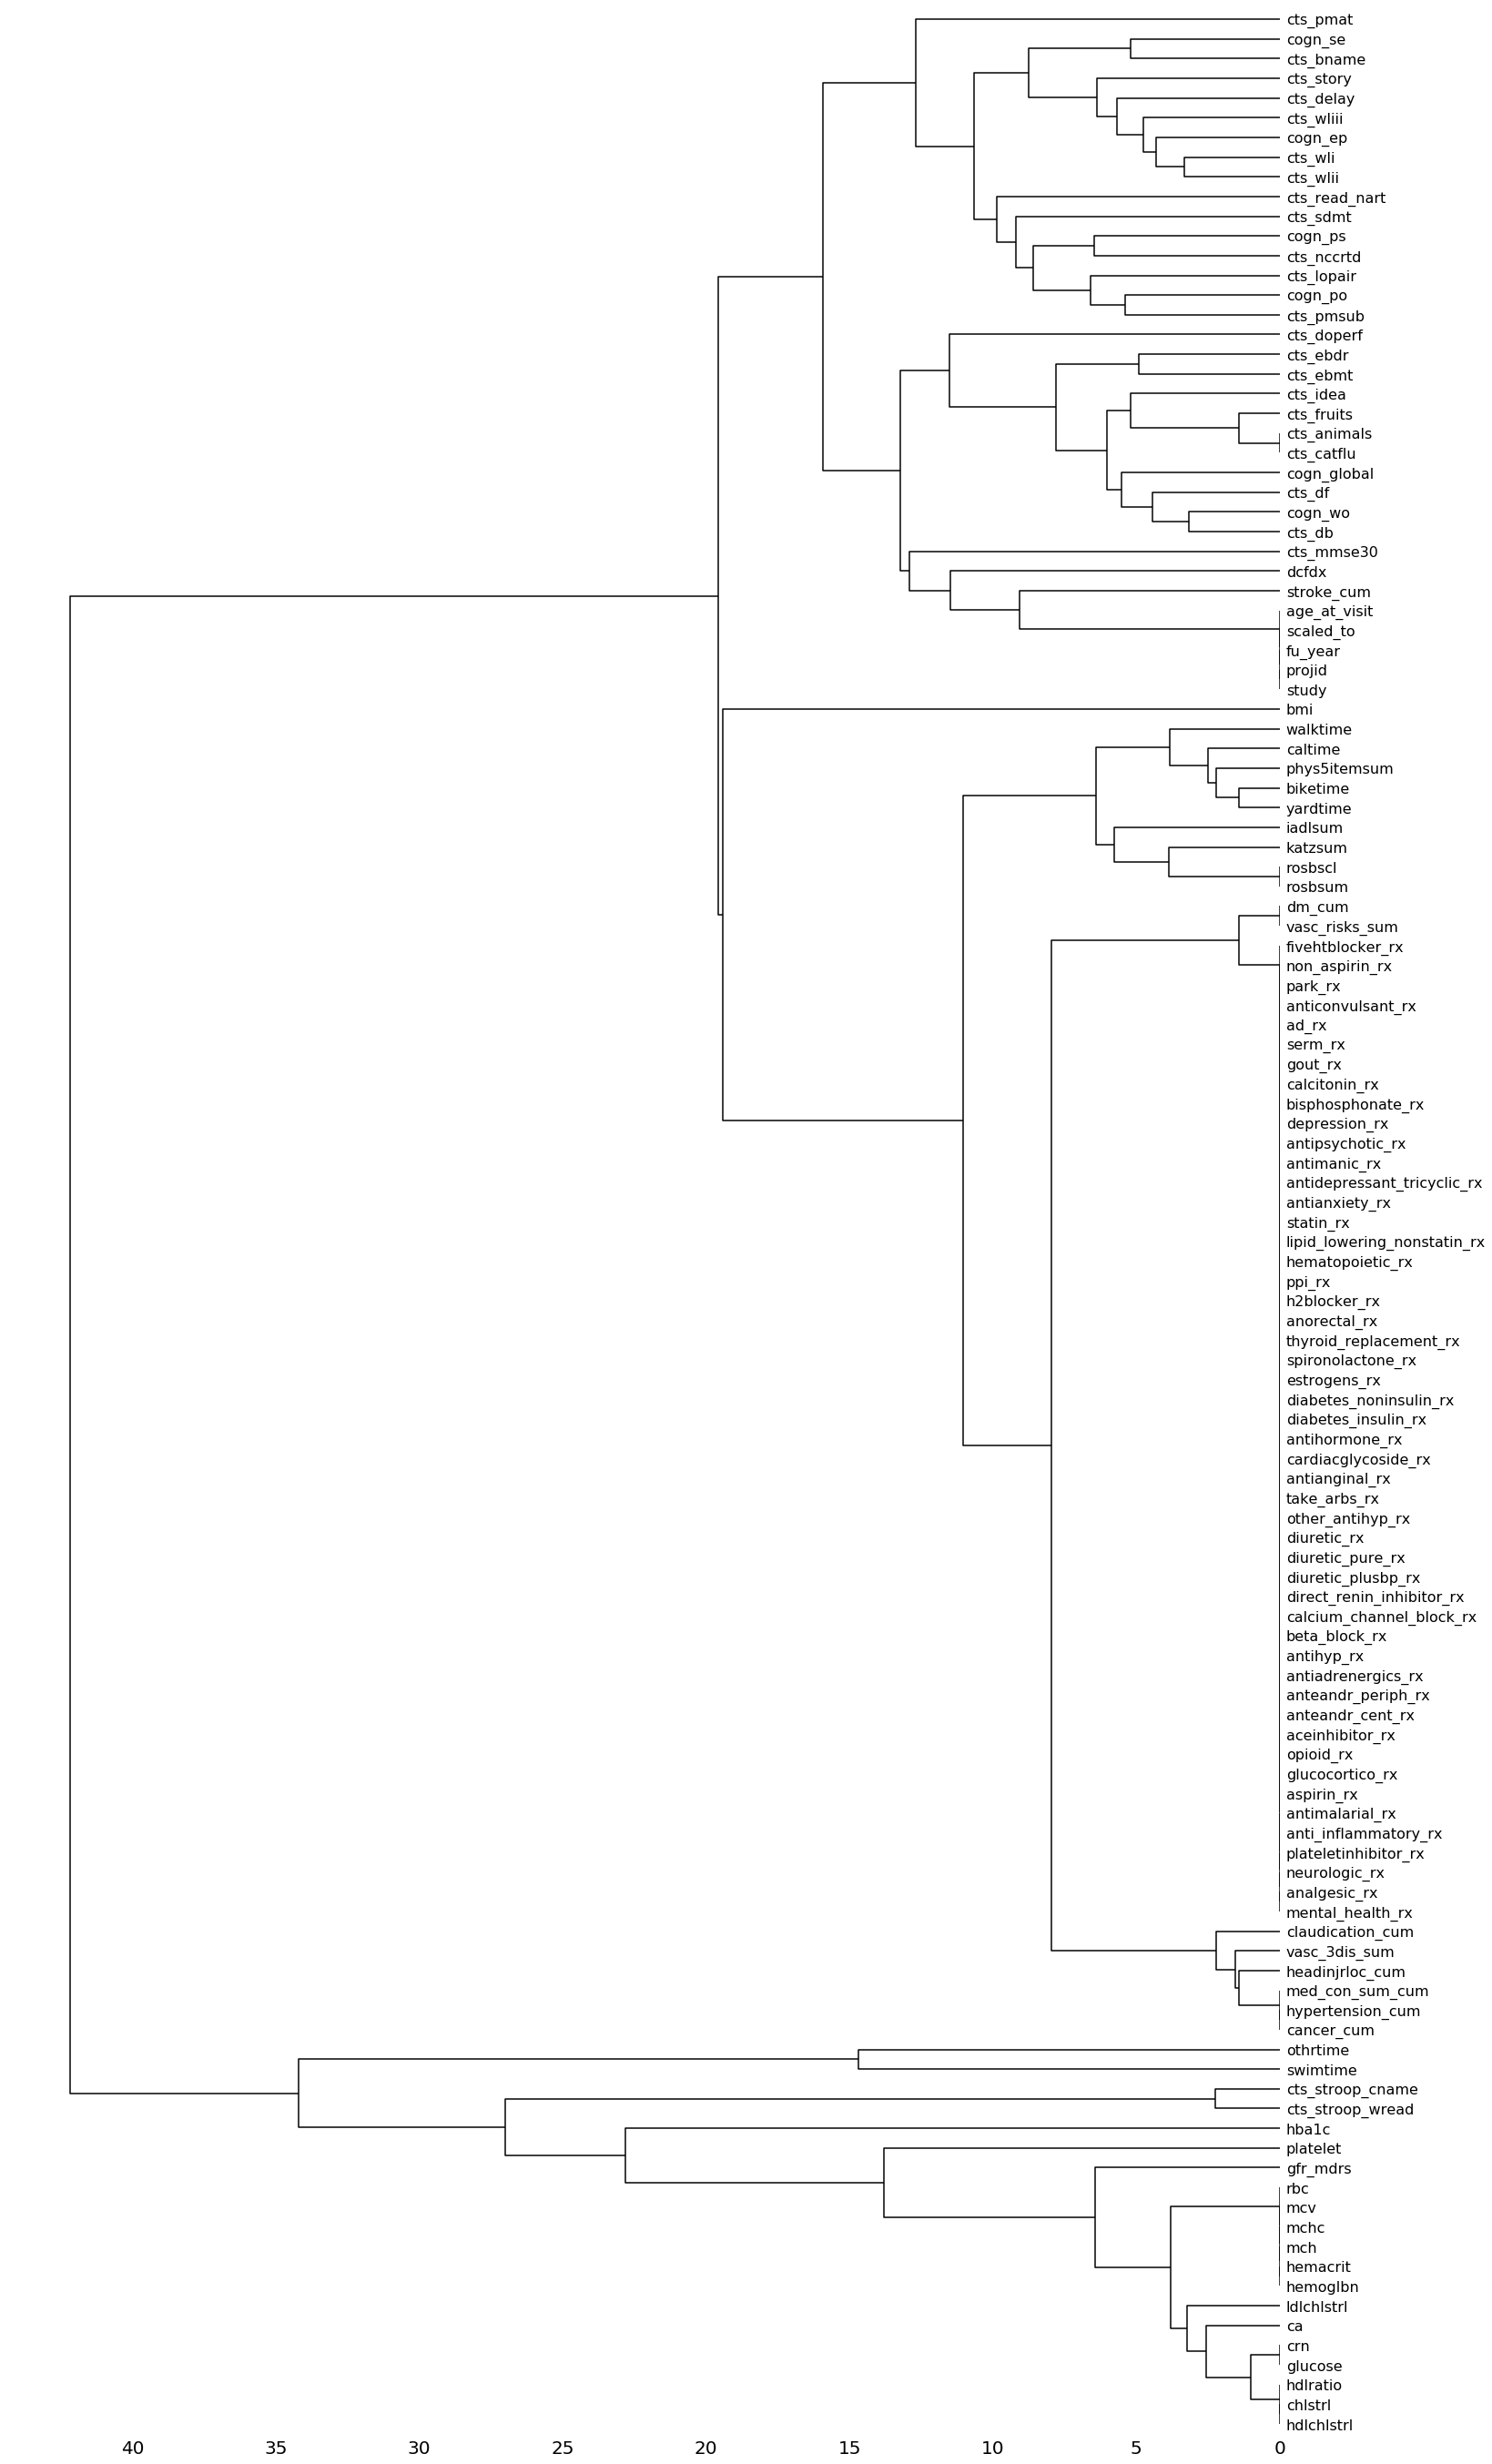

In [6]:
msno.dendrogram(data_set_cleaned)

#### NOTE:
###### 1. data_set_cleaned # this is a DF
###### 2. list_of_patient_diagnosed # this is a list of DF
###### 3. list_of_patient_not_diagnosed # this is a list of DF

From the above cell, give a brief visulization of the whole data set. For the next move, I think the test I will be running is to see the heat map of all patient with diagnosed and comoare it with all the patient that is not diagnosed. Want to find out what is the main differences we have between 2 data set.

<i>NOTE:</i>
1. The list_of_patient_diagnosed is a list of DF, that each element in the list is a patient, the data within that element is consist of a dataframe, that each row of that DF is a record of that patient visiting the clinic. NOTE: that for some visit the patient might not be diagnosed with Alzheimer. // The patient is added to this list if one of the visit the <b>"dcfdx" is larger or equals to 4</b>

2. The list_of_patient_not_diagnosed is a list of DF, that each element in the list is a patient too. But all of the patient in this list has <b>"dcfdx" smaller than 4</b>

### This is a good overveiw of the total dataframe, the dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap I think now I am going to split the DF to 2 pieces, instead of based on the patient, I am going to do one that is based on cases, primarily focused on the "dcfdx". Focus is to group the "dcfdx" >= 4 to one DF, "dcfdx" < 4 to another DF. Run the visual and see the possible clue

In [7]:
# 2 DF, one is diagnosed, one is not diagonesed
df_diagnosed_df_by_case, df_not_diagnosed_df_by_case = \
sort_cases(data_set_cleaned)
print("2 DF created, grouped by diagnosed and not diagnosed")

2 DF created, grouped by diagnosed and not diagnosed


###### 1. df_diagnosed_df_by_case # this is a DF "dcfdx" >= 4
###### 2. df_not_diagnosed_df_by_case # this is a DF "dcfdx" < 4

# Overview:
   ## What do I have now?
       1. I have the cleaned DF, dropped none important columns
       2. I have 2 lists, each list item represent a patient, and list is seperated by diagnosed and not diagnosed
       3. I have 2 DF, seperated by case, case is seperated by "dcfdx" >= 4 and smaller than 4
   ## What do I need to do next?
       1. heatmap for the 2 DF
       2. cased based analysis, use the 2 list
       3. look at the describe of both of the DF for diagonesd and not diagonesd, compare and graph the diff

In [8]:
df_diagnosed_desc = df_diagnosed_df_by_case.describe()
df_not_diagnosed_desc = df_not_diagnosed_df_by_case.describe()

print(df_diagnosed_desc.iloc[1])

ca                               9.380412
chlstrl                        202.096447
crn                              0.997919
gfr_mdrs                        64.511789
glucose                        107.157360
hba1c                            5.793525
hdlchlstrl                      60.213198
hdlratio                         3.563452
hemacrit                        39.834021
hemoglbn                        13.328866
ldlchlstrl                     112.757732
mch                             30.987113
mchc                            33.459278
mcv                             92.572680
platelet                       228.122905
rbc                              4.305412
dcfdx                            4.149160
cogn_ep                         -1.915264
cogn_po                         -1.105438
cogn_ps                         -1.645532
cogn_se                         -1.582807
cogn_wo                         -1.075039
cogn_global                     -1.627503
cts_animals                      7

In [9]:
print(df_diagnosed_desc)
print(df_not_diagnosed_desc)

               ca     chlstrl         crn    gfr_mdrs     glucose       hba1c  \
count  194.000000  197.000000  197.000000  195.000000  197.000000  139.000000   
mean     9.380412  202.096447    0.997919   64.511789  107.157360    5.793525   
std      0.396524   41.044598    0.280625   16.869976   30.490892    0.415149   
min      8.100000   77.000000    0.440000   20.638842   48.000000    4.500000   
25%      9.100000  174.000000    0.800000   53.373320   88.000000    5.600000   
50%      9.400000  202.000000    0.970000   64.494564  100.000000    5.800000   
75%      9.700000  225.000000    1.100000   75.323180  120.000000    5.950000   
max     10.400000  354.000000    2.370000  141.169742  245.000000    7.700000   

       hdlchlstrl    hdlratio    hemacrit    hemoglbn        ...         \
count  197.000000  197.000000  194.000000  194.000000        ...          
mean    60.213198    3.563452   39.834021   13.328866        ...          
std     17.256032    1.069753    4.720837    

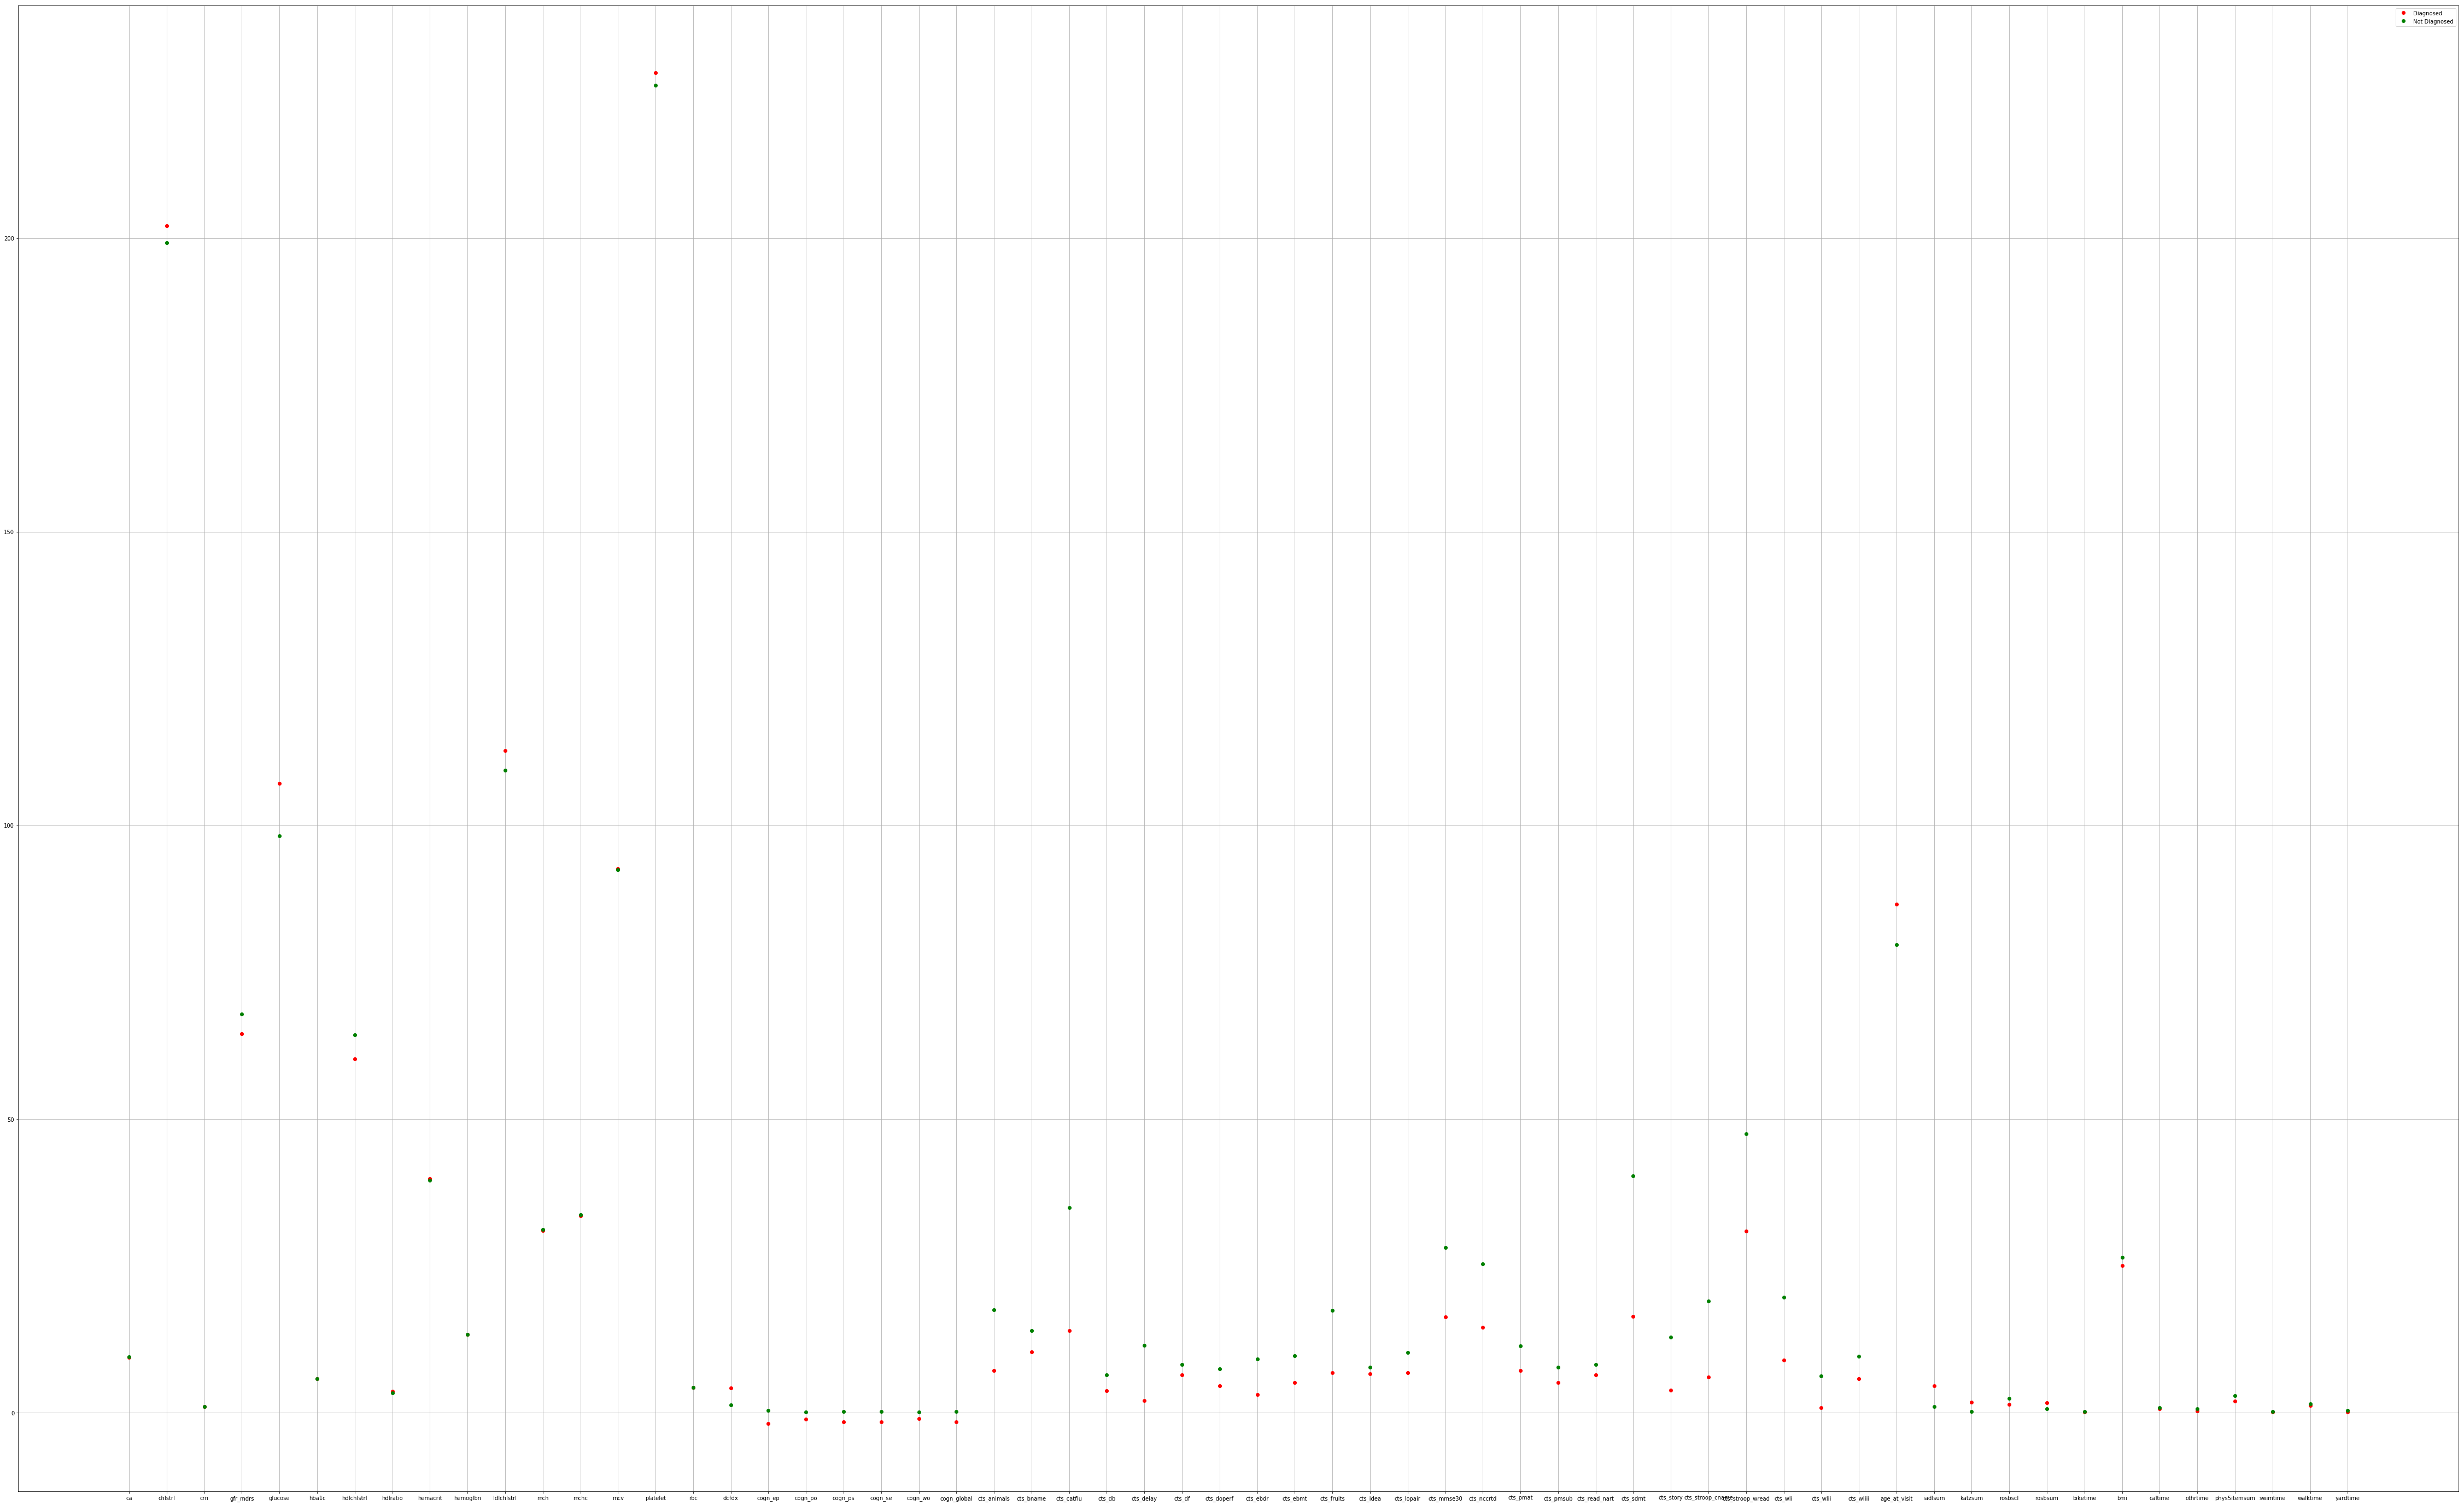

In [10]:
#df_diagnosed_desc.mean()[5:20].plot(kind="bar")
#df_not_diagnosed_desc.mean()[5:20].plot(kind="bar")
plt.figure(figsize=(80,50))
plt.plot(df_diagnosed_desc.iloc[1][:60], \
         label='Diagnosed',linestyle="",marker="o",color="red")
plt.plot(df_not_diagnosed_desc.iloc[1][:60], \
         label='Not Diagnosed',linestyle="",marker="o",color="green")
plt.legend(loc='best')
plt.grid()
plt.show()

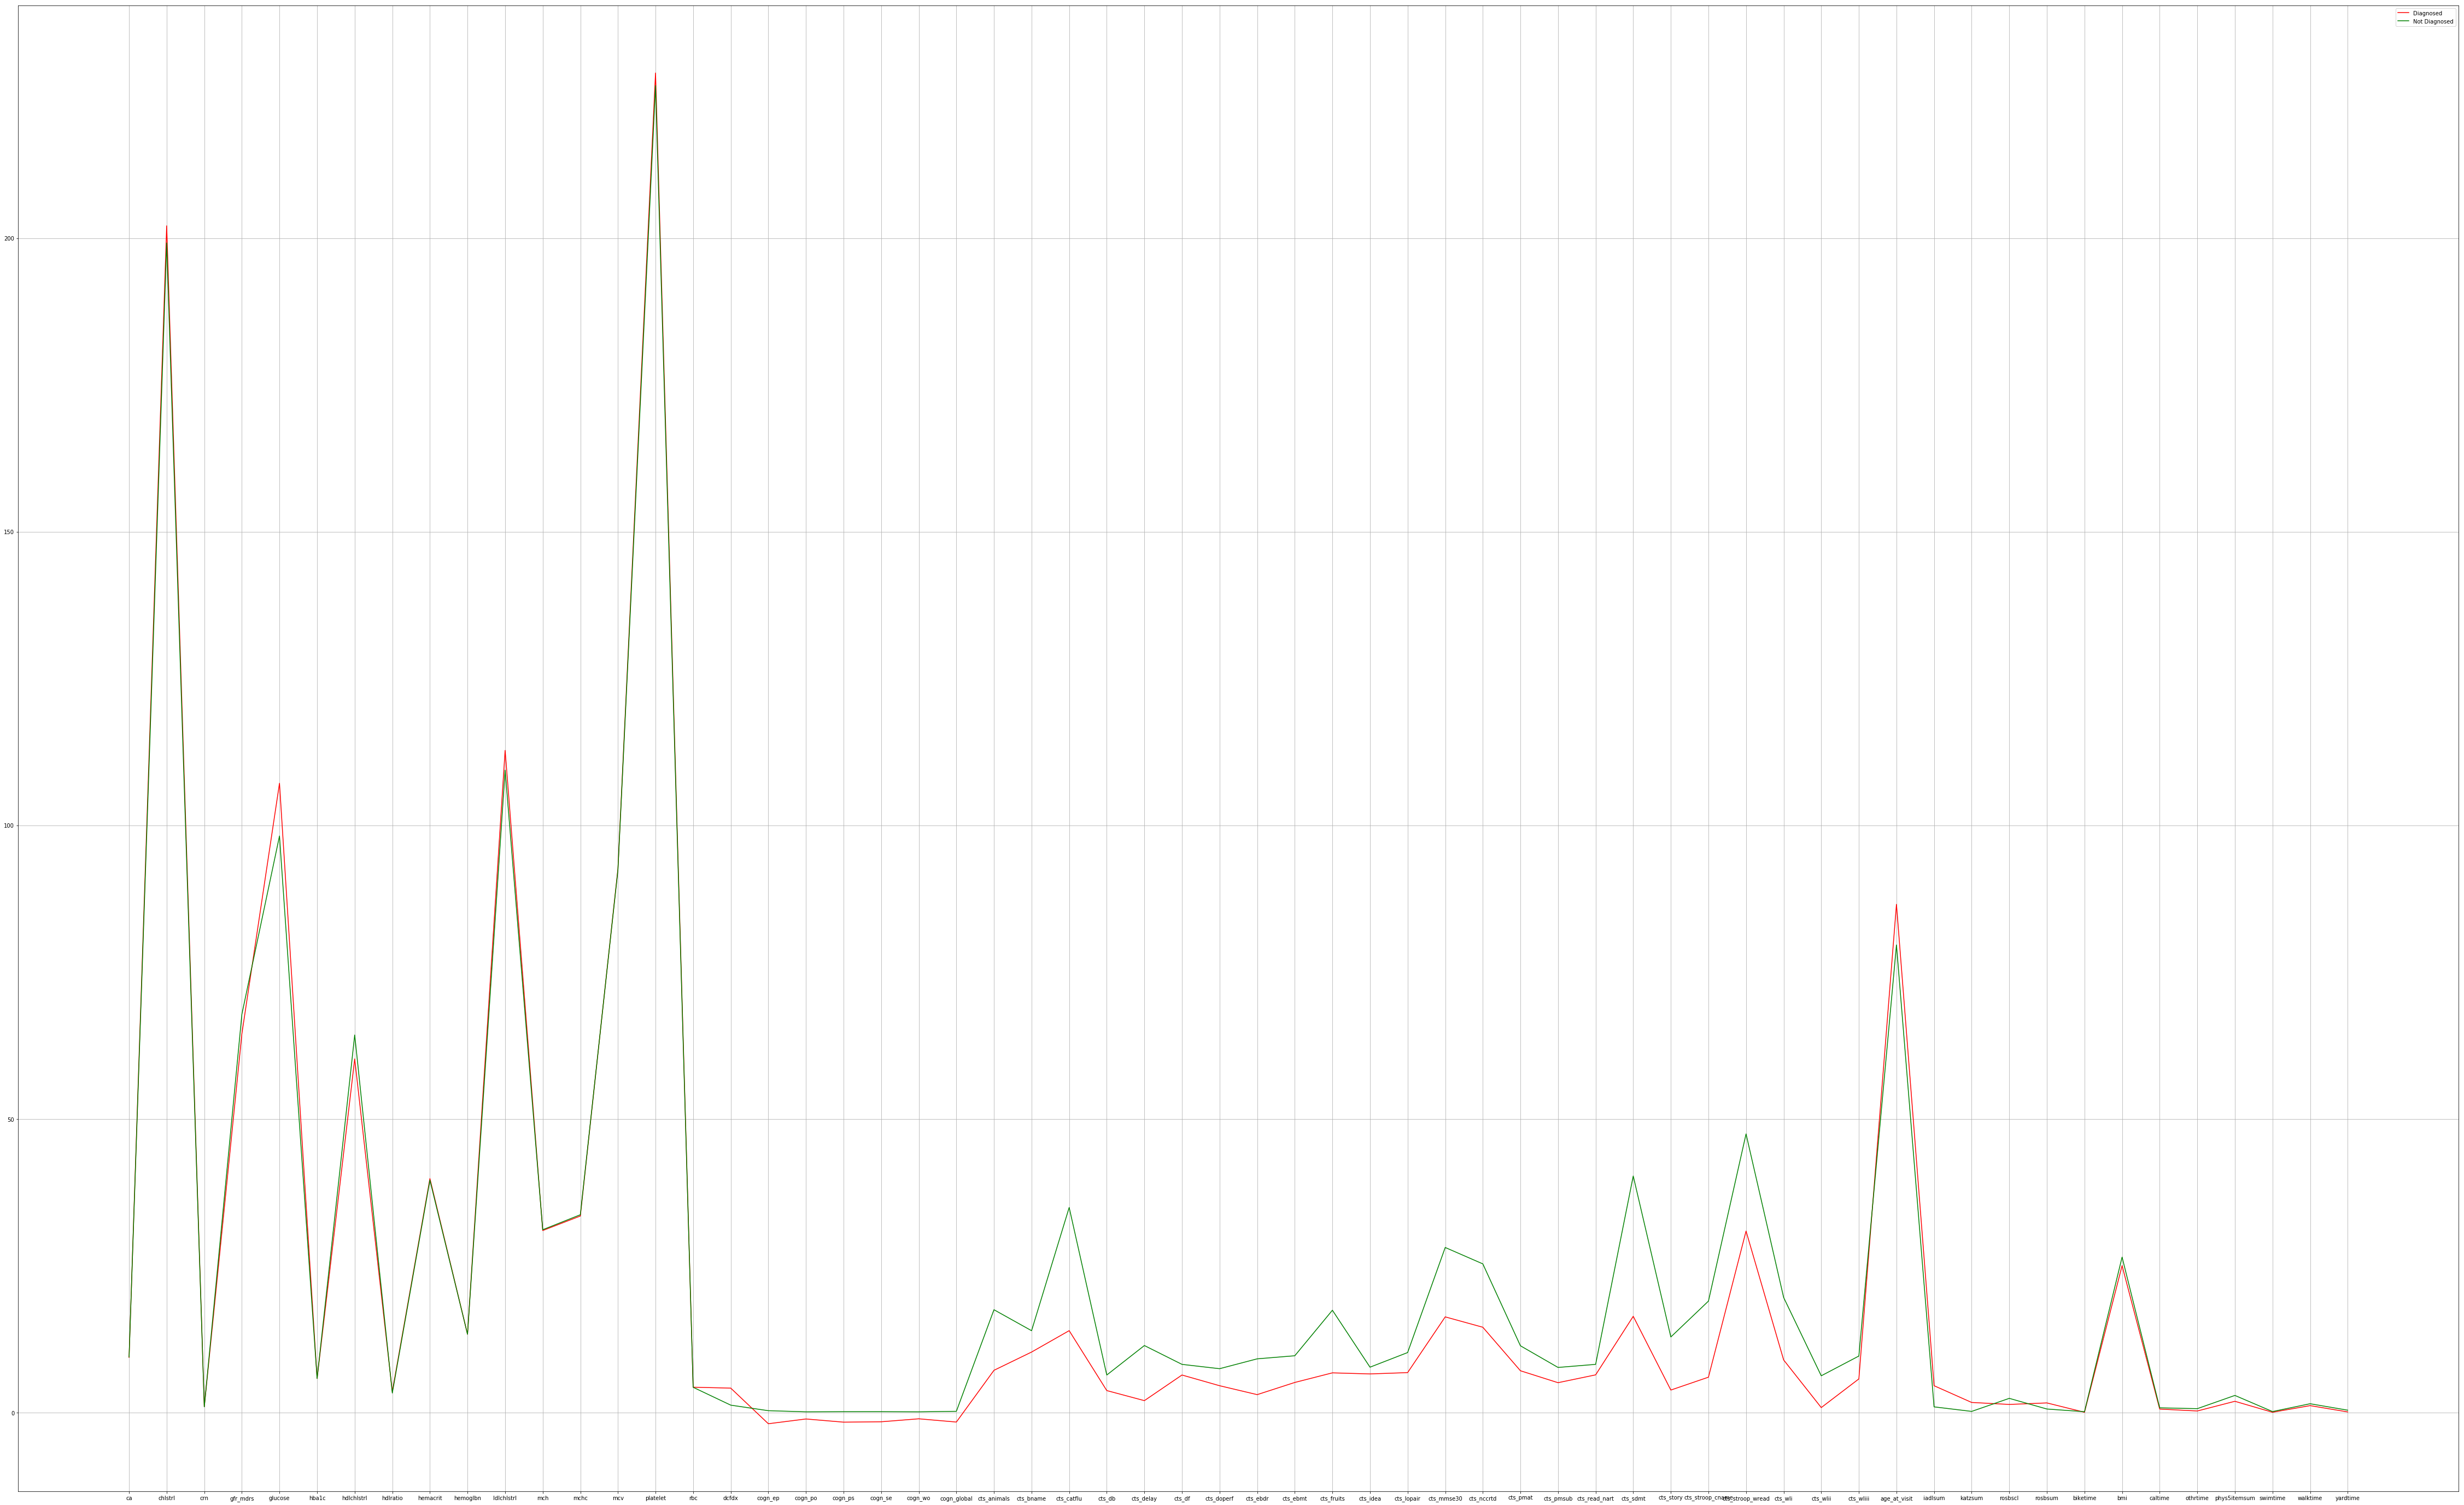

In [11]:
plt.figure(figsize=(80,50))
plt.plot(df_diagnosed_desc.iloc[1][:60], \
         label='Diagnosed',color="red")
plt.plot(df_not_diagnosed_desc.iloc[1][:60], \
         label='Not Diagnosed',color="green")
plt.legend(loc='best')
plt.grid()
plt.show()

### Now drawing the dendrogram
#### - First one is diagonsed
#### - Second one is not diagnosed

## The code below run the plot for a single patient that is <u> Diagonesd </u>
#### - The color of the line represent the stage. One graph for one patient

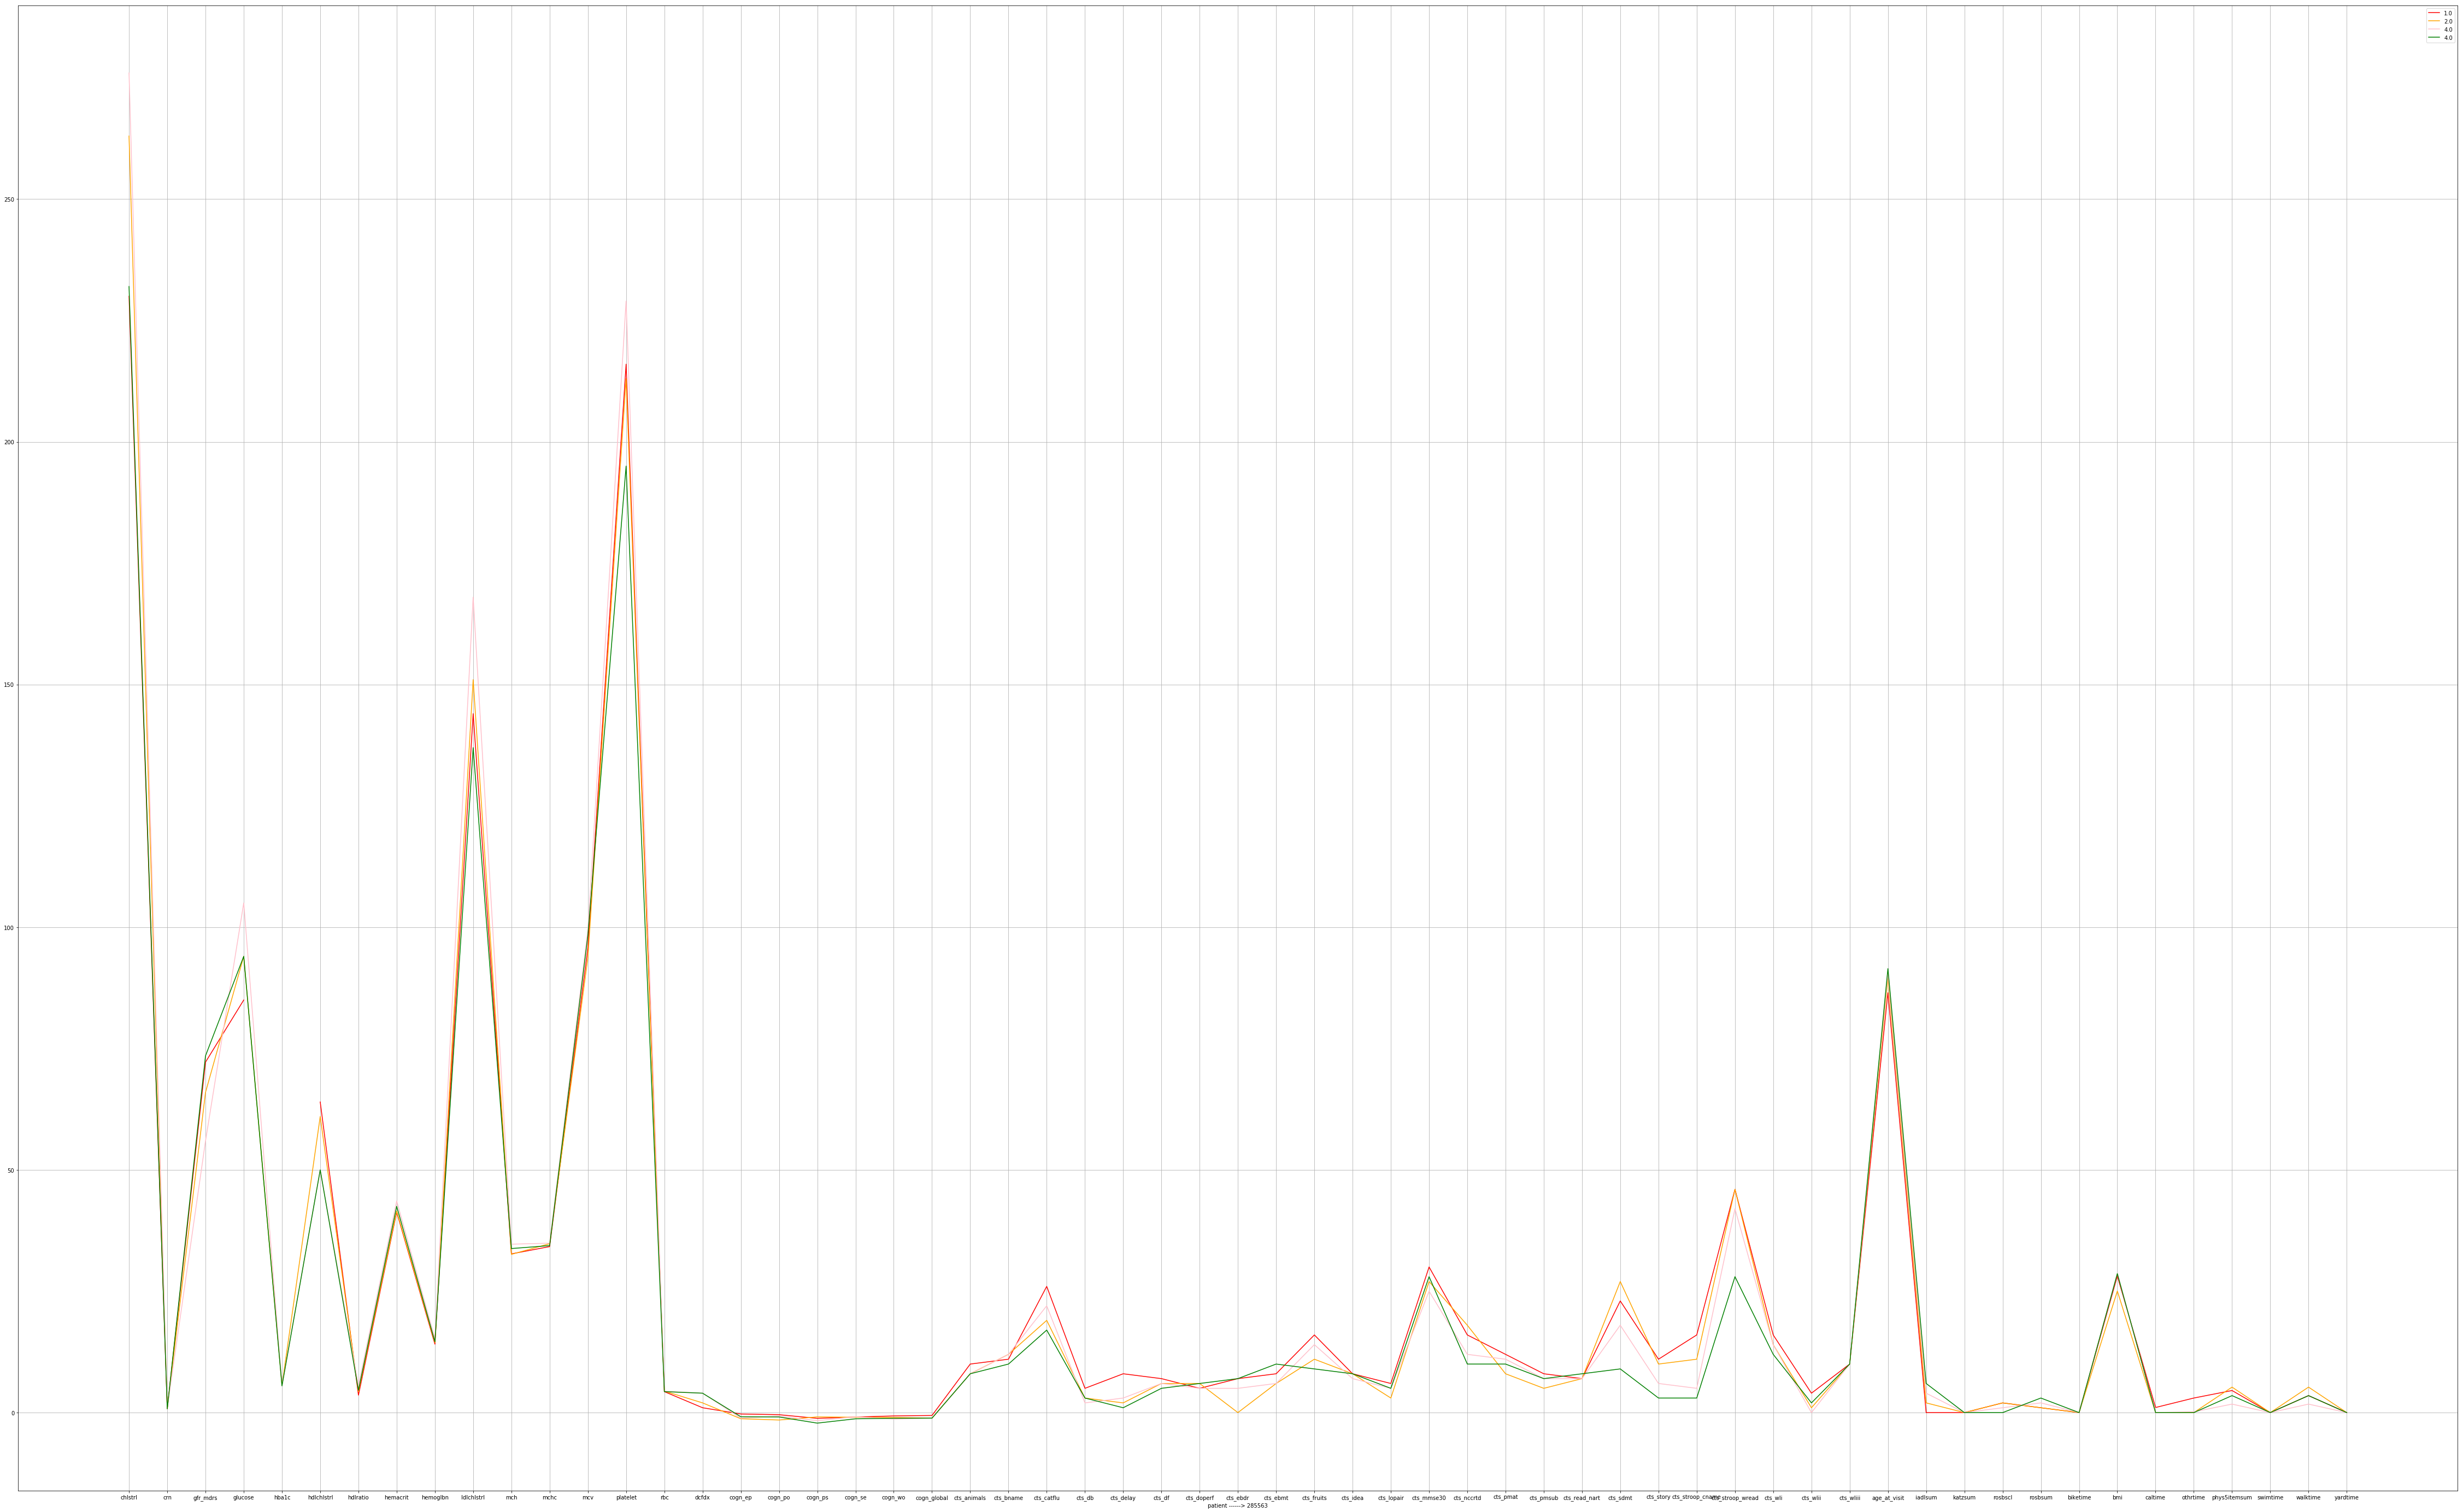

In [12]:
#list_of_patient_diagnosed
plt.figure(figsize=(80,50))
"""plt.plot(list_of_patient_diagnosed[0].iloc[1][5:64], \
         label='Diagnosed',color="red")
plt.plot(list_of_patient_diagnosed[0].iloc[2][5:64], \
         label='Not Diagnosed',color="green")"""

color = ["red","orange","pink","green","blue","indigo","violet","black","grey"]
# (red, orange, yellow, green, blue, indigo, violet)

for i in range(0,list_of_patient_diagnosed[0].shape[0]-1):
    plt.plot(list_of_patient_diagnosed[0].iloc[i][5:64], \
         label=list_of_patient_diagnosed[0].iloc[i]["dcfdx"],color=color[i])
    plt.xlabel('patient ------> ' + str(list_of_patient_diagnosed[0].iloc[i]["projid"]))


plt.legend(loc='best')
plt.grid()
plt.show()

## The code below run the plot for a single patient that is <u> NOT Diagonesd </u>
#### - The color of the line represent the stage. One graph for one patient

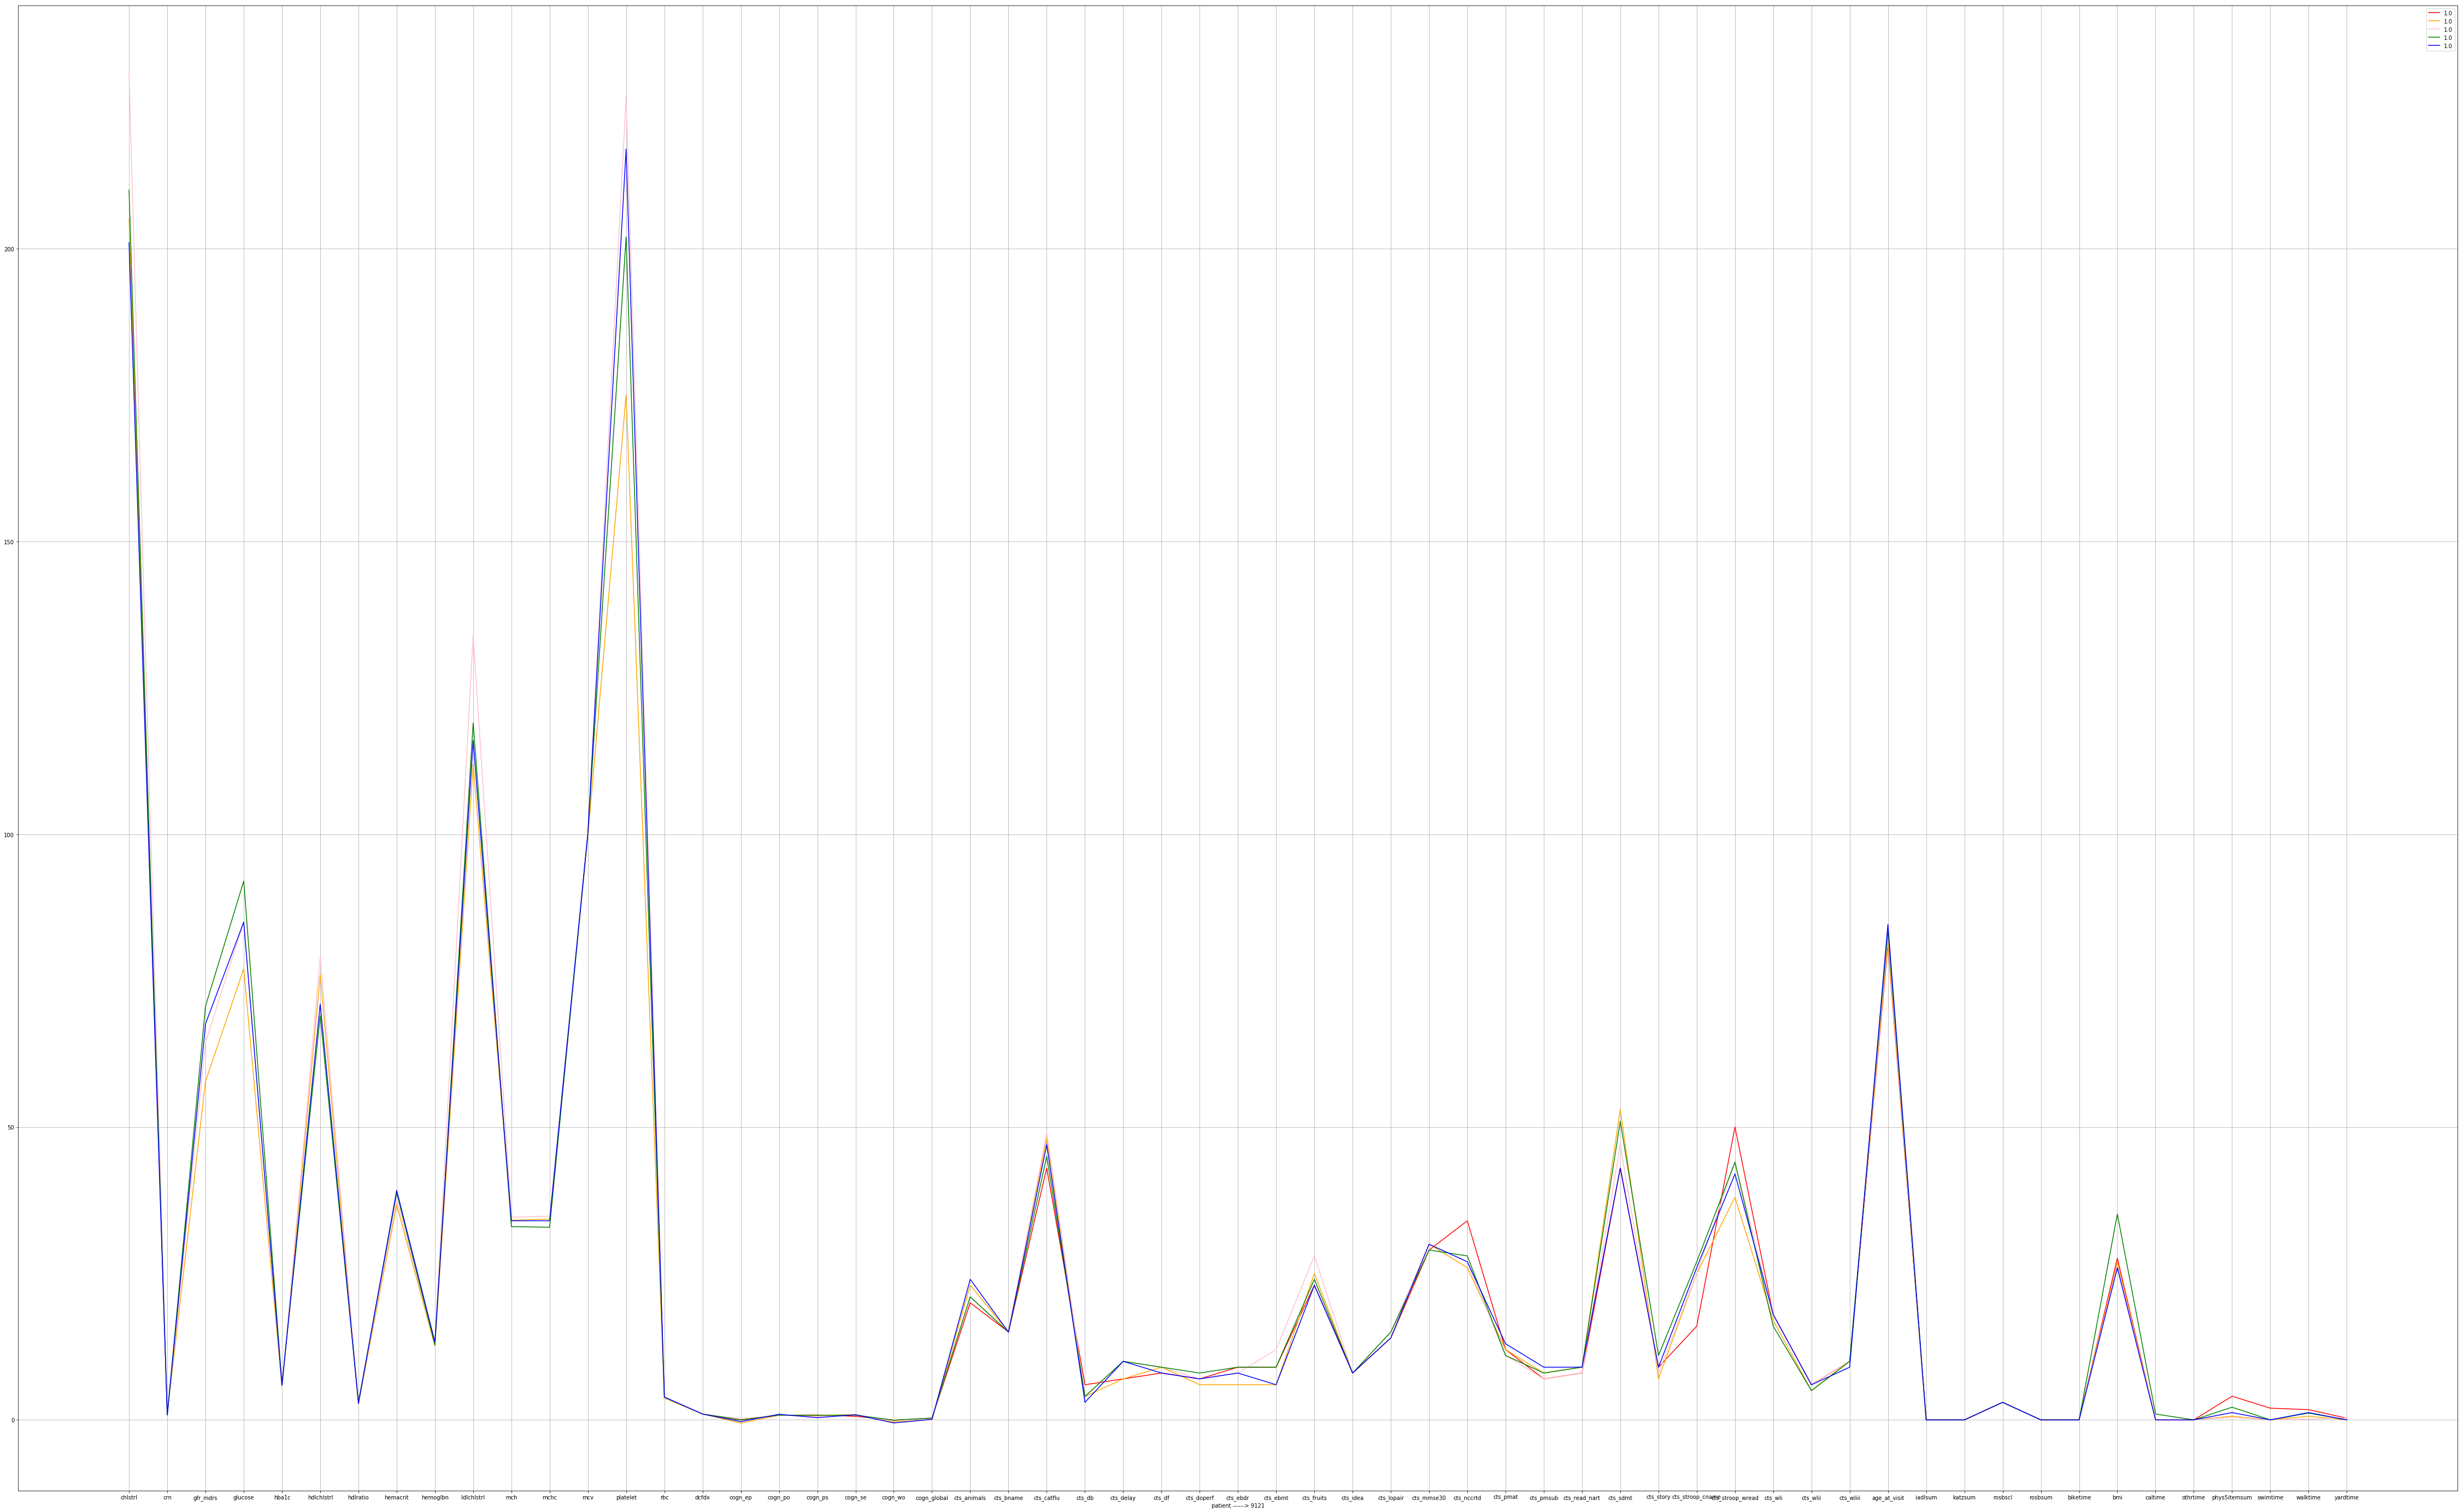

In [13]:
#list_of_patient_not_diagnosed
plt.figure(figsize=(80,50))
"""plt.plot(list_of_patient_diagnosed[0].iloc[1][5:64], \
         label='Diagnosed',color="red")
plt.plot(list_of_patient_diagnosed[0].iloc[2][5:64], \
         label='Not Diagnosed',color="green")"""

color = ["red","orange","pink","green","blue","indigo","violet","black","grey"]
# (red, orange, yellow, green, blue, indigo, violet)

for i in range(0,list_of_patient_not_diagnosed[0].shape[0]-1):
    plt.plot(list_of_patient_not_diagnosed[0].iloc[i][5:64], \
         label=list_of_patient_not_diagnosed[0].iloc[i]["dcfdx"],color=color[i])
    plt.xlabel('patient ------> ' + str(list_of_patient_not_diagnosed[0].iloc[i]["projid"]))


plt.legend(loc='best')
plt.grid()
plt.show()

## Need to implement in this week:
#### - T test
#### - Normalization of all the data
#### - A speed of increase in all the attribute a.k.a the trend, to see if it can forcast anything to indicate the possible diagnose status

## I will be working on the T-test first
#### After the T test, I will be focus on the jump of patient data from stage 1 to stage 4. by doing this, I can see the change in data that is more significant compare to what I have now

#### First, I will need to filter the data by replace the originial |sort_cases function:
#### The dcfdx_split_lvl will be altered, and a new var will be added.
###### dcfdx_split_lvl_1 = 1
###### dcfdx_split_lvl_2 = 4

In [18]:
def sort_cases_for_other_stages(cleaned_df): # based on the parameter DF, create 2 DF, based on
                            # the value of "dcfdx". smaller or larger than 4
    dcfdx_split_lvl_1 = 1     # diagnosed flag >= 4 diagnosed, smaller than 4 is not
    dcfdx_split_lvl_2 = 2
    cleaned_df = cleaned_df.reset_index(drop = True)  # df reindexed
    # need to create 2 empty df
    df_column_name_list = list(cleaned_df)
    tot_rows = cleaned_df.shape[0]

    new_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list) #create a new empty df
    new_not_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list)

    for row in range(0, tot_rows):  # loop through all the rows in the DF
        if cleaned_df.iloc[row]['dcfdx'] >= dcfdx_split_lvl_2:
            # get the df row that is larger than 4
            new_diagnosed_df_by_case = new_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        elif cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_1:
            # get the df row that is smaller than 4
            new_not_diagnosed_df_by_case = new_not_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        else:
            continue
    return new_not_diagnosed_df_by_case, new_diagnosed_df_by_case
#---------------------------------------------------------            
df_dcfdx_stage_1, df_dcfdx_stage_4 = \
sort_cases_for_other_stages(data_set_cleaned)
print("sorting completed")

sorting completed


#### By doing the above I acquire the dataframe I needed for spotting the difference between the dcfdx = 1, and >= 4
#### These 2 df will be used to run a t-test first
But first, run a describe of these two DF, in the meantime, see the missing datas

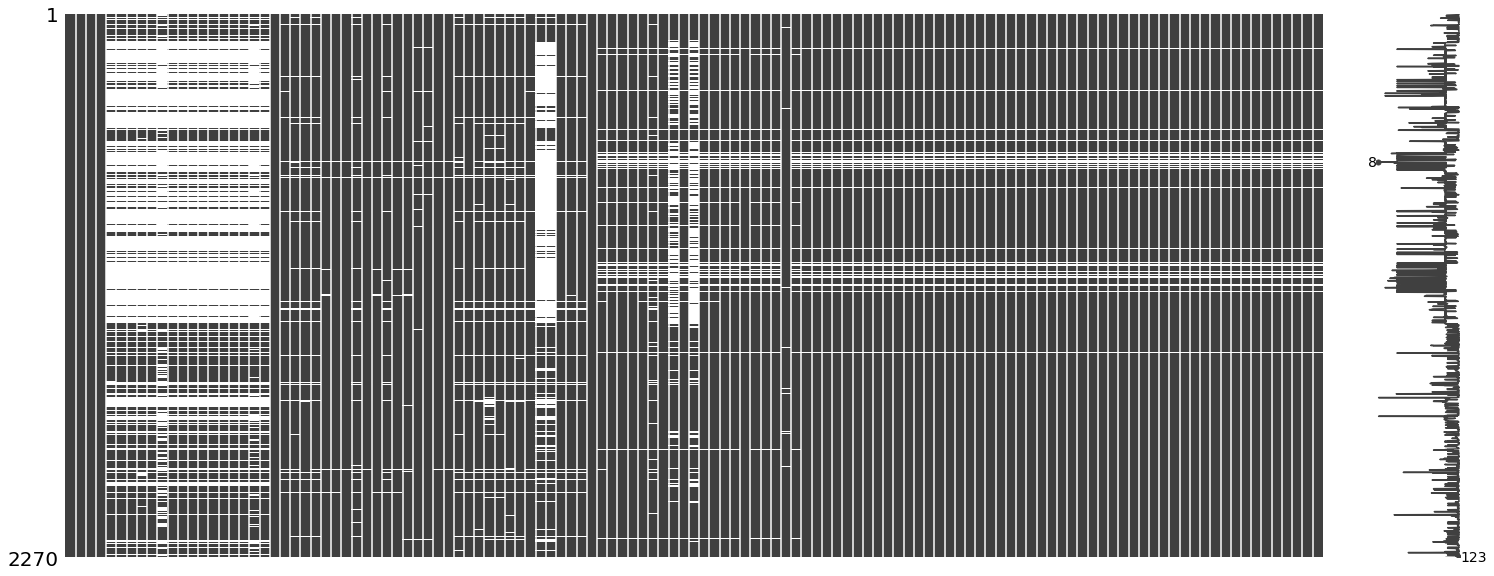

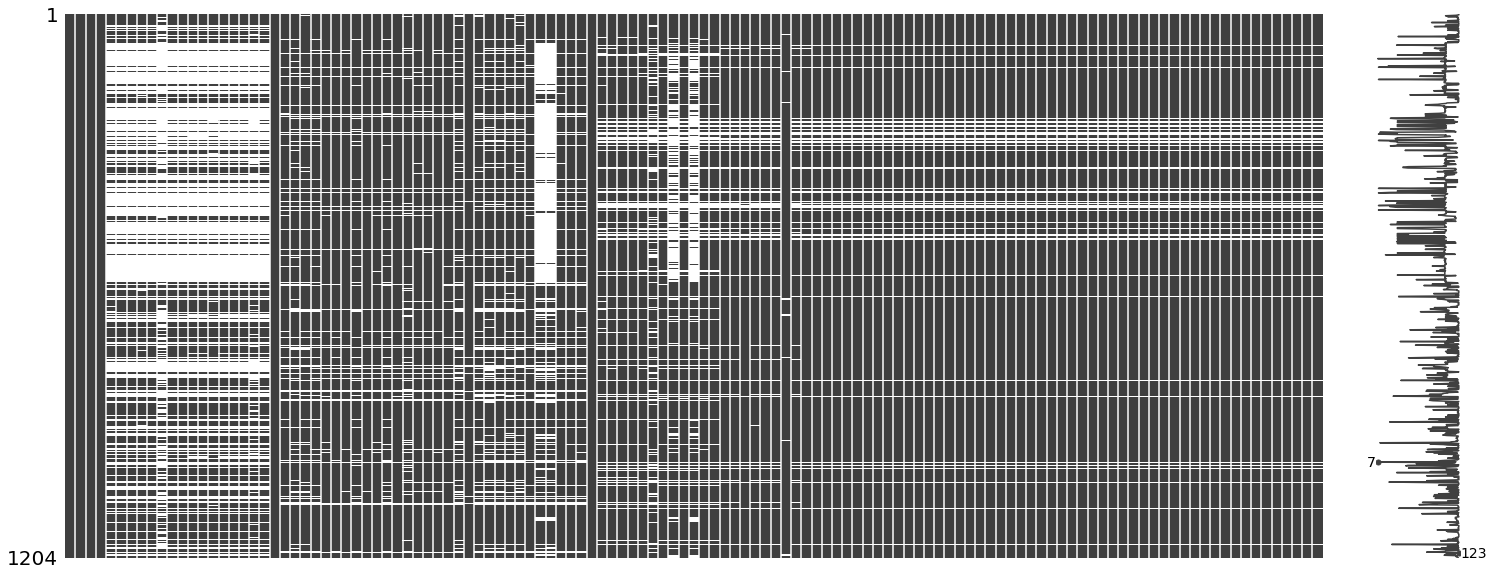

In [23]:
#missing data visualize
msno.matrix(df_dcfdx_stage_1)
msno.matrix(df_dcfdx_stage_4)

The percentage of missing data is relative the same.

In [24]:
stage_1_df_desc = df_dcfdx_stage_1.describe()
stage_4_df_desc = df_dcfdx_stage_4.describe()

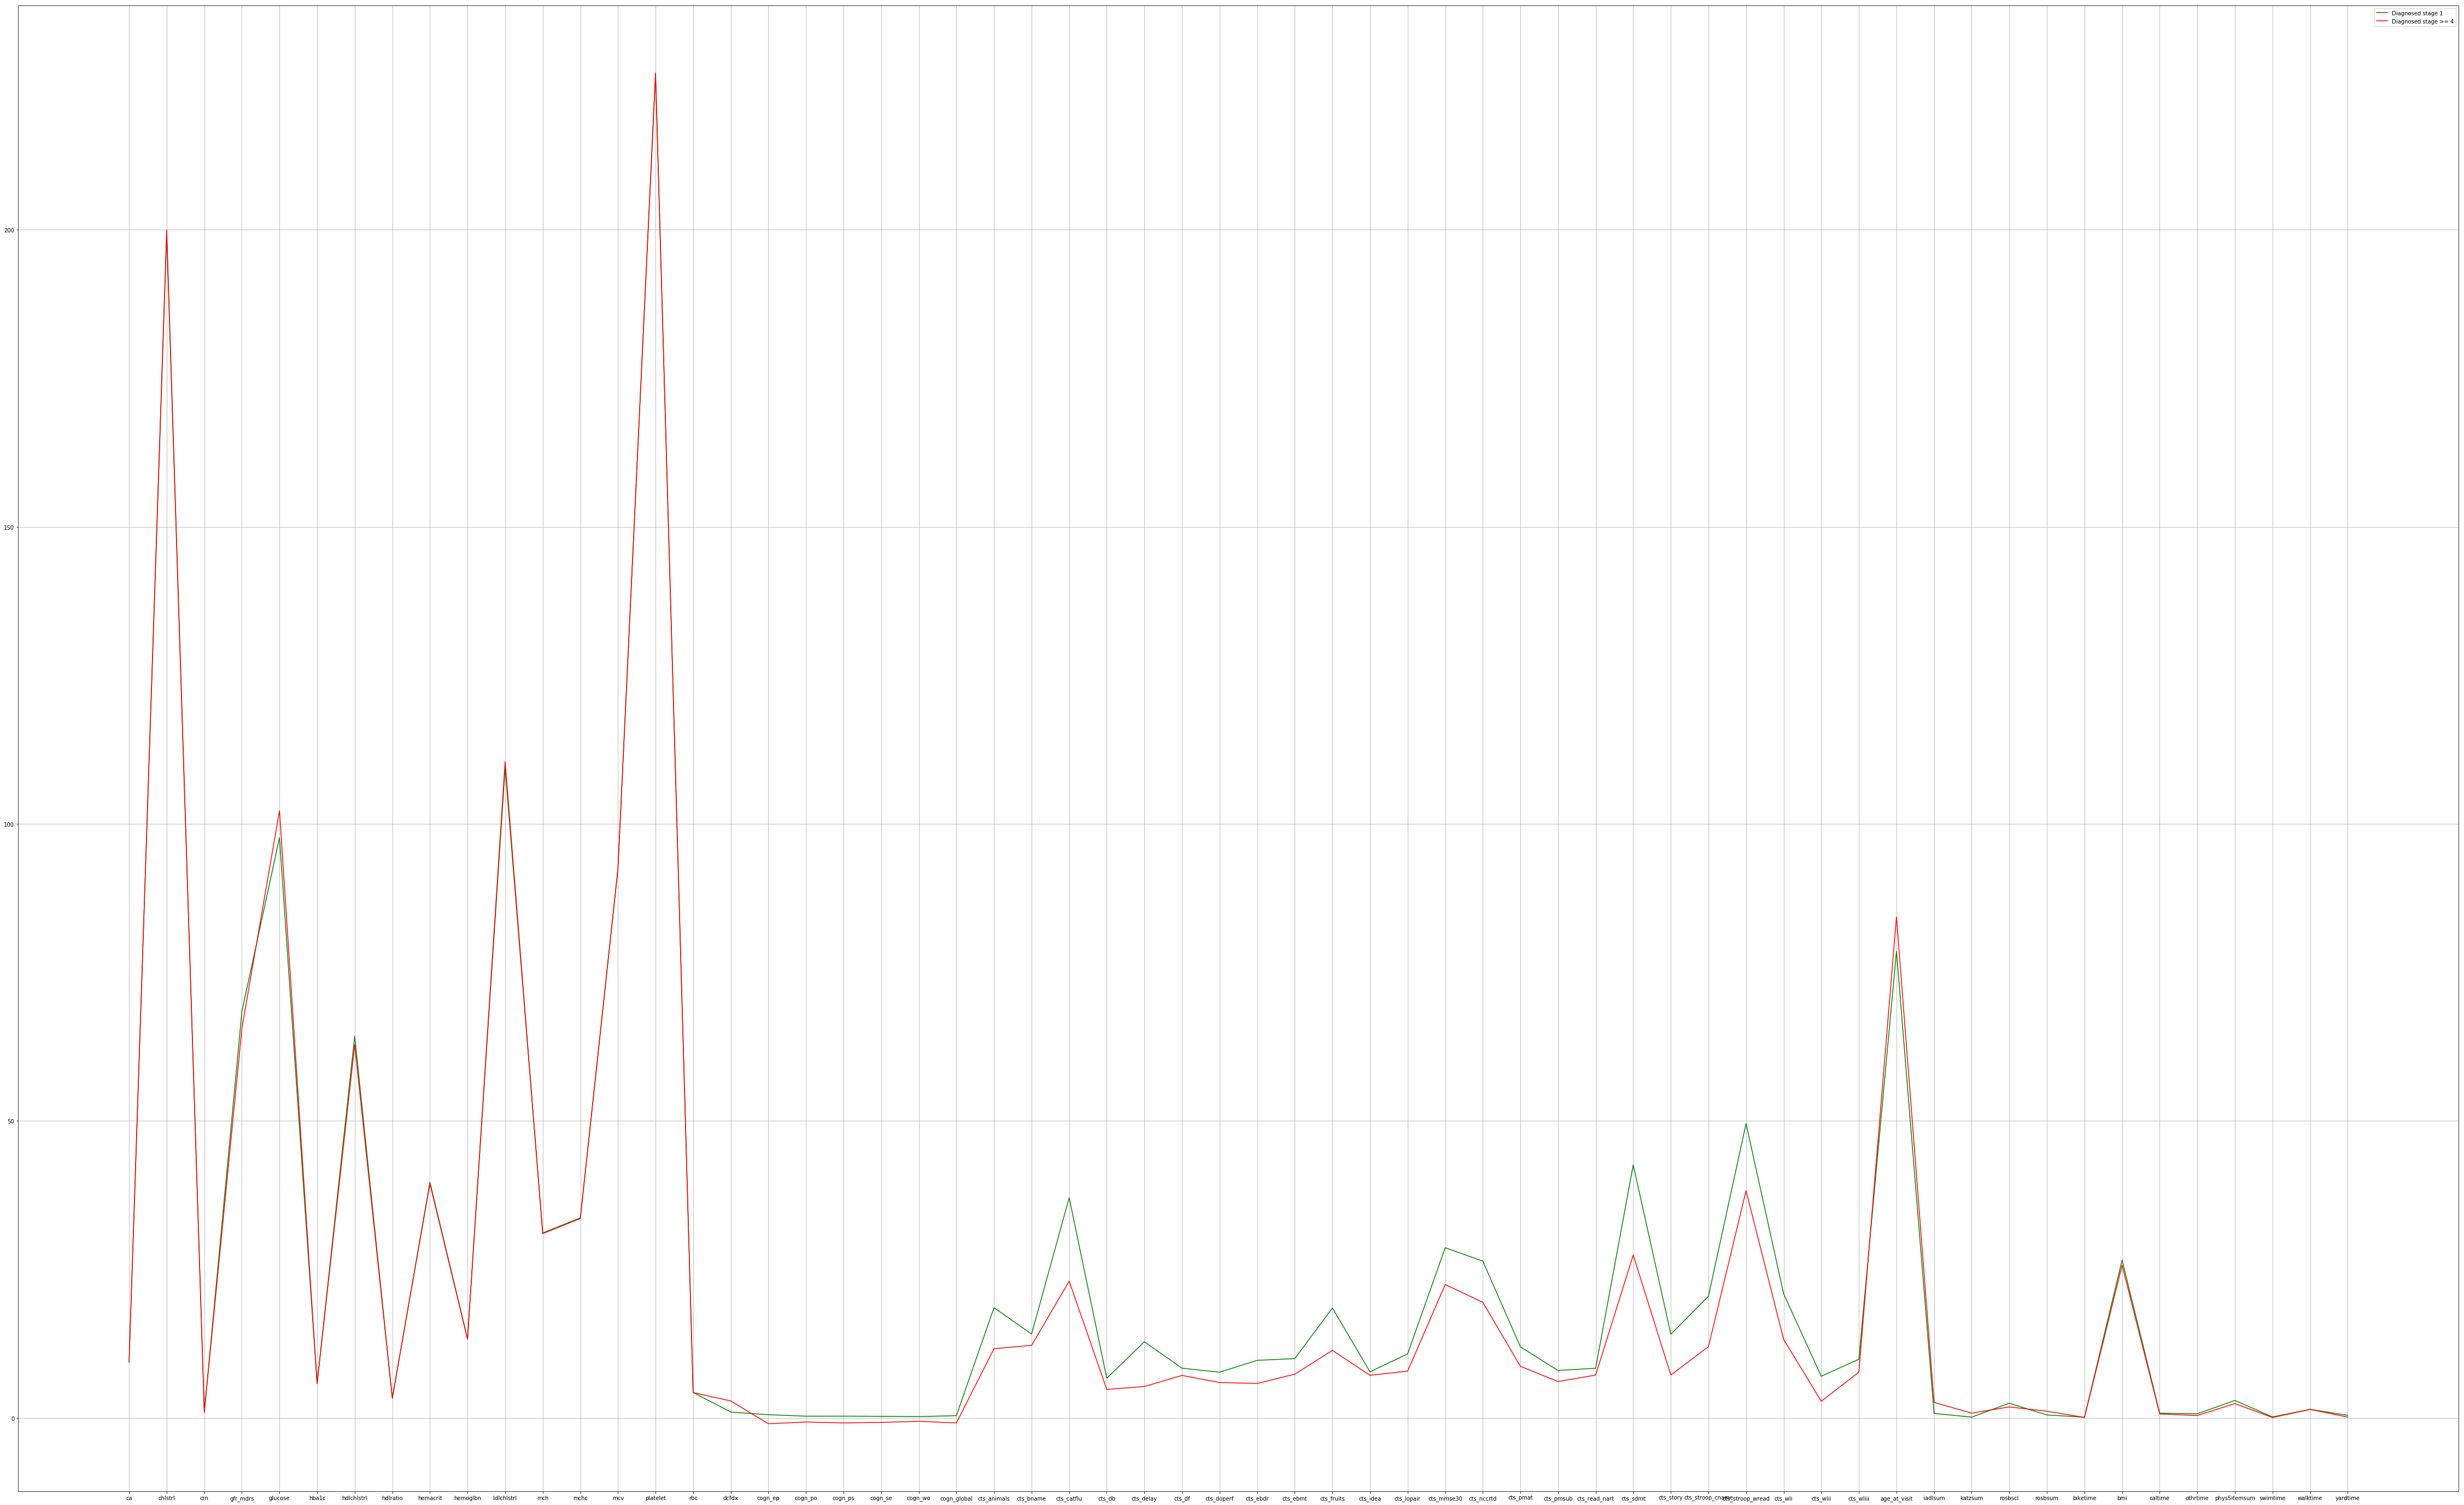

In [22]:
# plot the graph to compare these 2
plt.figure(figsize=(80,50))
plt.plot(stage_1_df_desc.iloc[1][:60], \
         label='Diagnosed stage 1',color="green")
plt.plot(stage_4_df_desc.iloc[1][:60], \
         label='Diagnosed stage >= 4',color="red")
plt.legend(loc='best')
plt.grid()
plt.show()

# This is the comparison of the stage lvl larger/equal to 4, and with the
# stage that is equals to one.

Based on the graph that is showned above, I think it is best for me to run a t test on these attributes:
    1. age_at_visit
    2. all the cts_* values
    3. cogn_* all values
    4. glucose
    5. hdlchlstr

In [34]:
stage_1_prep_t = df_dcfdx_stage_1["glucose"][:]
stage_4_prep_t = df_dcfdx_stage_4["glucose"][:]
# need to drop the nan values
stage_1_prep_t = stage_1_prep_t.dropna()
stage_4_prep_t = stage_4_prep_t.dropna()

# now, for the t-test of glucose
ttest_ind(stage_1_prep_t, stage_4_prep_t)

Ttest_indResult(statistic=-3.3365883137261467, pvalue=0.0008677037429135115)

#### The p = .08% this is much less than the 5% - PASS
#### The t-stat var, I am not sure, need to ask